# Project Break I: EDA

A continuación se detalla la estructura que he seguido para este proyecto

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_gym = pd.read_csv("/Users/beatrizcartiel/Desktop/gym_members_exercise_tracking.csv")


## Business care & Data Collection

Nota: A continuación muestro las hipótesis iniciales y que surgieron tras un brainstorming. Sin embargo, a medida que he avanzado el trabajo me he quedado con 13.

### Bloque de hipótesis - Relación entre entrenamiento y rendimiento
- H1: Los miembros que entrenan con mayor frecuencia queman más calorías en promedio.
- H2: La duración de la sesión tiene una relación positiva con las calorías quemadas.
- H3: El tipo de entrenamiento (Workout_Type) influye significativamente en las calorías quemadas (Ej. Cardio quema más calorías que Yoga).
- H4: La frecuencia cardíaca máxima (Max_BPM) y promedio (Avg_BPM) es mayor en los entrenamientos más intensos como HIIT o Strength.
- H5: Las personas con menor porcentaje de grasa (Fat_Percentage) queman más calorías durante la sesión.
- H6: La ingesta de agua (Water_Intake) tiene un impacto positivo en el rendimiento (calorías quemadas, frecuencia cardíaca promedio).

### Bloque de hipótesis - Comparativas entre grupos demográficos

- H7: El género influye en las calorías quemadas durante el entrenamiento.
- H8: Las personas más jóvenes (Age) tienen sesiones más largas y queman más calorías que las personas mayores.
- H9: El nivel de experiencia (Experience_Level) está relacionado con un mayor rendimiento (más calorías quemadas, mayor frecuencia cardíaca máxima).
- H10: Las personas con mayor índice de masa corporal (BMI) tienden a quemar más calorías en cada sesión debido al esfuerzo adicional.

### Bloque de hipótesis - Análisis de hábitos y frecuencia de entrenamiento
- H11: Los miembros que entrenan más días a la semana (Workout_Frequency) tienen menor porcentaje de grasa corporal.
- H12: La duración de la sesión tiende a ser menor a medida que aumenta la frecuencia semanal de entrenamiento (distribución de esfuerzo).
- H13: La frecuencia cardíaca en reposo (Resting_BPM) es menor en personas que entrenan más días a la semana.
- H14: Los miembros con menor índice de masa corporal (BMI) entrenan con mayor frecuencia semanal.

### Bloque de hipótesis - Relación entre variables fisiológicas
- H15: La frecuencia cardíaca en reposo (Resting_BPM) es menor en personas con menor porcentaje de grasa corporal.
- H16: Existe una relación inversa entre BMI y Workout_Frequency: a mayor BMI, menor es la frecuencia semanal de entrenamiento.
- H17: Las personas con mayor Max_BPM y Avg_BPM queman más calorías.

### Bloque de hipótesis - Evaluación del nivel de experiencia
- H18: Los miembros con mayor Experience_Level tienen sesiones más cortas pero más efectivas (más calorías quemadas por unidad de tiempo).
- H19: Las personas con mayor experiencia tienen una mejor relación entre frecuencia cardíaca máxima y promedio (Max_BPM vs. Avg_BPM).
- H20: Los miembros más experimentados tienen menor porcentaje de grasa corporal.

### Bloque de hipótesis - Combinaciones avanzadas
- H21: La combinación de Workout_Type y Experience_Level influye en las calorías quemadas (Ej. Los experimentados queman más calorías en Cardio).
- H22: Las personas que entrenan más días a la semana e ingieren más agua tienen menor porcentaje de grasa corporal.
- H23: La frecuencia cardíaca en reposo (Resting_BPM) disminuye conforme aumenta la frecuencia semanal y la experiencia del entrenamiento.





## Data Understanding

In [76]:
# Verifico si hay valores nulos en el dataset
df_gym.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Calories_per_hour                0
Age_group                        0
BMI_Category                     0
Session_Length_Category          0
dtype: int64

In [77]:
# Veo si hay missings
df_gym.isnull().sum() / len(df_gym) * 100

Age                              0.0
Gender                           0.0
Weight (kg)                      0.0
Height (m)                       0.0
Max_BPM                          0.0
Avg_BPM                          0.0
Resting_BPM                      0.0
Session_Duration (hours)         0.0
Calories_Burned                  0.0
Workout_Type                     0.0
Fat_Percentage                   0.0
Water_Intake (liters)            0.0
Workout_Frequency (days/week)    0.0
Experience_Level                 0.0
BMI                              0.0
Calories_per_hour                0.0
Age_group                        0.0
BMI_Category                     0.0
Session_Length_Category          0.0
dtype: float64

In [79]:
# Verifico si tengo filas duplicadas
print(df_gym.duplicated().sum())

0


In [11]:
df_gym.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [12]:
df_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [13]:
df_gym.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

### Clasifico el nombre de las variables iniciales y las nuevas métricas calculadas

In [80]:
# La siguiente tabla me va a ayudar en el análisis univariatne, bivariante y multivariante

| **Columna**                        | **Tipo de dato** | **Naturaleza**         |
|-----------------------------------|------------------|------------------------|
| Age                             | int             | Numérica (discreta)    |
| Gender                          | object          | Categórica             |
| Weight (kg)                     | float           | Numérica (continua)    |
| Height (m)                      | float           | Numérica (continua)    |
| Max_BPM                         | int             | Numérica (continua)    |
| Avg_BPM                         | int             | Numérica (continua)    |
| Resting_BPM                     | int             | Numérica (continua)    |
| Session_Duration (hours)        | float           | Numérica (continua)    |
| Calories_Burned                 | float           | Numérica (continua)    |
| Workout_Type                    | object          | Categórica             |
| Fat_Percentage                  | float           | Numérica (continua)    |
| Water_Intake (liters)           | float           | Numérica (continua)    |
| Workout_Frequency (days/week)   | int             | Numérica (discreta)    |
| Experience_Level                | int             | Categórica ordinal     |
| BM                             | float           | Numérica (continua)    |


## Data Cleaning

In [47]:
'''
Explorando los datos me ha parecido interesante hacer lo siguiente:

- Crear una métrica calculada; ratio calorías / duración de la sesión. 
- Agrupar las edades en rangos. A la hora de establecer los rangos he estado varias páginas en internet, pero me he quedado con el rango que da la OMS. La clasificación quedaría de la siguiente manera:
        * Adulto joven: 18 a 44 años
        * Adulto medio: 45 a 59 años
        * Adulto mayor: 60 a 74 años
        * Anciano: 75 a 90 años
        * Anciano longevo: > 90 años
        Fuente de la clasificación de la OMS -> https://www.infobae.com/peru/2024/10/25/eres-un-adulto-mayor-o-un-anciano-esta-es-la-clasificacion-de-la-oms-para-las-personas-desde-los-60-hasta-los-90-anos/
        Nota 1: Además en mi dataset no hay menores de 18 años con lo cual voy a usar dicha clasificación.
        Nota 2: Dado que las variables del dataset están en inglés voy a poner todo en inglés para darle esa coherencia. 
        Nota 3: Soy consciente que la edad máxima es de 59 años - lo he calculado previamente -, pero si el futuro el dataset se incrementa con nuevos datos me parece interesante tener esta clasificación hecha de antemano.
- Agrupar el Índice de Masa Corporal, en inglés IMC (BMI) según los criterios de la OMS:
        * Bajo peso: Menos de 18.5 (kg/m²)
        * Peso normal: 18.5 - 24.9 (kg/m²)
        * Sobrepeso: 25.0 - 29.9 (kg/m²)
        * Sobrepeso: 25.0 - 29.9 (kg/m²)
        * Obesiad clase I: 30.0 - 34.9 (kg/m²)
        * Obesiad clase II: 35.0 - 39.9 (kg/m²)   
        * Obesiad clase III: 40.0 o más (kg/m²)              
        Fuente: https://www.who.int/es/news-room/fact-sheets/detail/obesity-and-overweight
- Agrupar la duración de las sesiones en:
        * Corta: igual o por debajo del primer cuartil.
        * Media: entre el percentil 25% y 50%
        * Larga: entre el percentil 50% y 75%
        * Muy larga: mayor del tercer cuartil hasta el máximo
'''


'\nExplorando los datos me ha parecido interesante hacer lo siguiente:\n\n- Crear una métrica calculada; ratio calorías / duración de la sesión. \n- Agrupar las edades en rangos. A la hora de establecer los rangos he estado varias páginas en internet, pero me he quedado con el rango que da la OMS. La clasificación quedaría de la siguiente manera:\n        * Adulto joven: 18 a 44 años\n        * Adulto medio: 45 a 59 años\n        * Adulto mayor: 60 a 74 años\n        * Anciano: 75 a 90 años\n        * Anciano longevo: > 90 años\n        Fuente de la clasificación de la OMS -> https://www.infobae.com/peru/2024/10/25/eres-un-adulto-mayor-o-un-anciano-esta-es-la-clasificacion-de-la-oms-para-las-personas-desde-los-60-hasta-los-90-anos/\n        Nota 1: Además en mi dataset no hay menores de 18 años con lo cual voy a usar dicha clasificación.\n        Nota 2: Dado que las variables del dataset están en inglés voy a poner todo en inglés para darle esa coherencia. \n        Nota 3: Soy consci

In [28]:
# Creo la métrica calculada de calorias / duración de la sesión
df_gym['Calories_per_hour'] = df_gym['Calories_Burned'] / df_gym['Session_Duration (hours)']
df_gym['Calories_per_hour'] = df_gym['Calories_per_hour'].round(0) # hago el redondeo

In [39]:
# Establezco los rangos para agrupar las edades según el criterio de la OMS
bins_age = [18, 44, 59, 74, 90, 100]
labels = ['Young Adult', 'Early Adult', 'Middle-aged Adult', 'Older Adult', 'Older Adult +']
df_gym['Age_group'] = pd.cut(df_gym['Age'], bins=bins_age, labels=labels, right=False)
print(df_gym[['Age', 'Age_group']].head())


   Age    Age_group
0   56  Early Adult
1   46  Early Adult
2   32  Young Adult
3   25  Young Adult
4   38  Young Adult


In [40]:
# Hago la clasificación para el IMC (en inglés BMI) según el criterio de la OMS
bins_bmi = [0, 18.5, 25, 30, 35, 40, float('inf')]
labels_bmi = ['Underweight', 'Normal weight', 'Overweight', 'Obesity Class I', 'Obesity Class II', 'Obesity Class III']
df_gym['BMI_Category'] = pd.cut(df_gym['BMI'], bins=bins_bmi, labels=labels_bmi, right=False)
print(df_gym[['BMI', 'BMI_Category']].head())

     BMI     BMI_Category
0  30.20  Obesity Class I
1  32.00  Obesity Class I
2  24.71    Normal weight
3  18.41      Underweight
4  14.39      Underweight


In [44]:
# Defino la duración de la sesión
percentiles = df_gym['Session_Duration (hours)'].quantile([0.25, 0.5, 0.75])
bins_duration = [0, percentiles[0.25], percentiles[0.5], percentiles[0.75], df_gym['Session_Duration (hours)'].max()]
labels_duration = ['Short', 'Medium', 'Long', 'Very long']
df_gym['Session_Length_Category'] = pd.cut(df_gym['Session_Duration (hours)'], bins=bins_duration, labels=labels_duration, right=True)

In [45]:
df_gym.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  Calories_per_hour    Age_group     BMI_Category  \
0  30.20              777.0  Early Adult  Obesity Class I   
1  32.00              679.0  Early Adult  Obesity Class I   
2  24.71              610.0  Young Adult    Normal weight   
3  18.41              902.0  Young Adult      Underweight   
4  14.39              869.0  Young Adult      Underweight   

  Session_Length_Category  
0               Very long  
1                    Long  
2                  Medium  
3                   Short  
4                   Short

Una vez creadas las nuevas variables, continuo con el análisis de los outliers

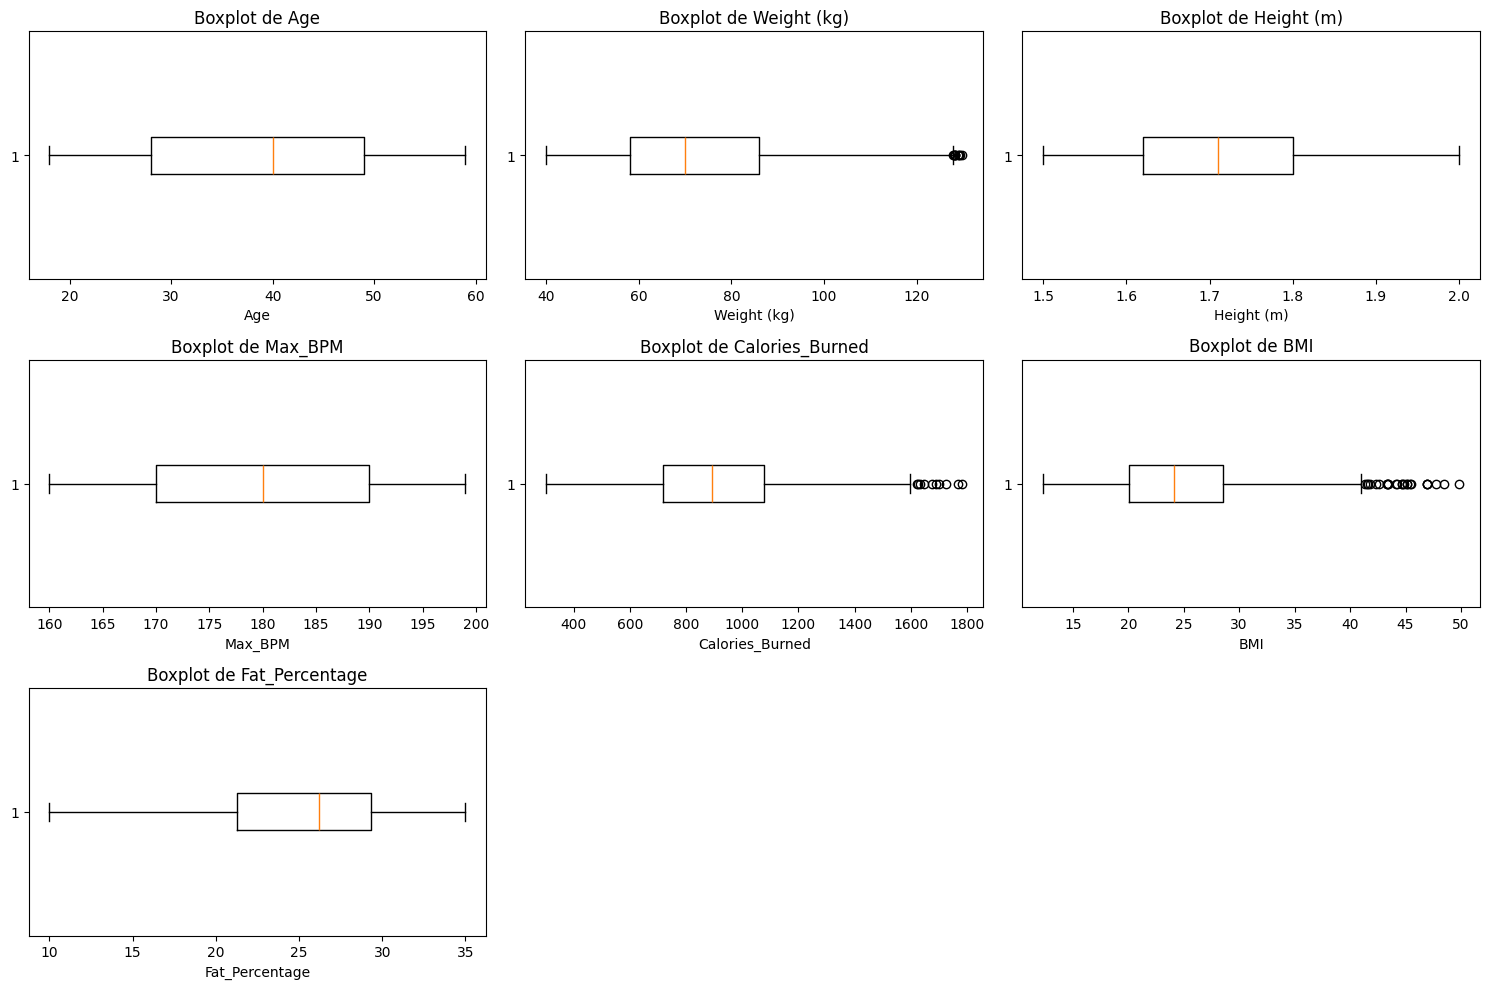

In [48]:
# Investigo si hay outliers - para las numéricas - 
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Calories_Burned', 'BMI', 'Fat_Percentage']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df_gym[col], vert=False)
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

Hago un listado de lo más signficativo que veo de las gráficas de bloxplot:

1. Hay outliers en el extremo superior de la variable **Weight (kg)**. Son pesos por encima de 110 kg
2. En el caso de la variable **Max_BPM** hay muy pocos outliers(> 190 BPM.)
3. Para la variable **Caloires_Burned** si que hay outliers importantes en el extremo superior, es decir, pertenecen a calorias quemadas por encima de las 1400, tengo que comprobar si tienen que ver con entramientos más intensos o de larga duración.
4. Para el **BMI** hay outliers en el extremo superior, hay personas con valores cercanos o superiores a 40. Voy a ver si puedo analizarlos con "Fat_Percentage" o "Calories_Burned"
5. En **Fat_Percentage** hay outlierts en el extremo superior con valores del 30% al 35%. Quizas me ayude a entender el perfil de salud de esas personas y su rendimiento.

[Importante]: Estos outliers no son errores, más bien son interesante de analizar


# Analysis

## Análisis Univariante

Estadísticos univariantes para variables numéricas:
                                    Media Mediana   Moda      Varianza  \
Age                             38.683453    40.0     43    148.222511   
Weight (kg)                     73.854676    70.0   57.7    449.295839   
Height (m)                        1.72258    1.71   1.62      0.016296   
Max_BPM                        179.883864   180.0    198    132.704909   
Avg_BPM                        143.766701   143.0    132    205.570443   
Resting_BPM                     62.223022    62.0     50     53.630631   
Session_Duration (hours)         1.256423    1.26   1.03      0.117551   
Calories_Burned                905.422405   893.0  883.0  74257.000402   
Fat_Percentage                  24.976773    26.2   28.1     39.140057   
Water_Intake (liters)            2.626619     2.6    3.5      0.359836   
Workout_Frequency (days/week)    3.321686     3.0      3      0.832798   
Experience_Level                 1.809866     2.0      2    

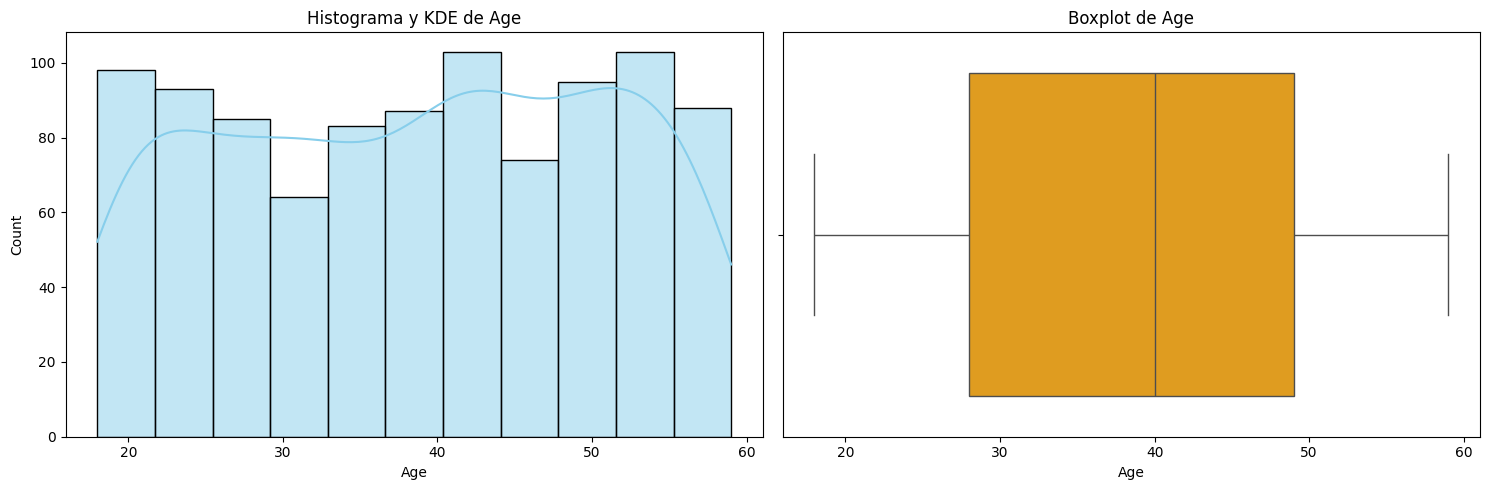

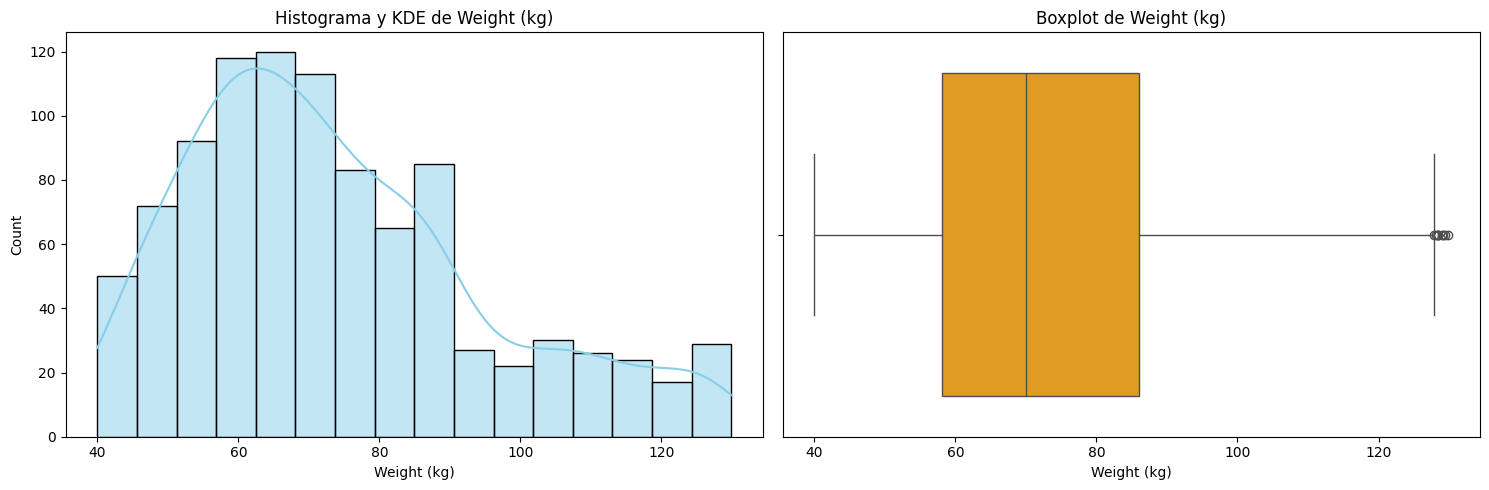

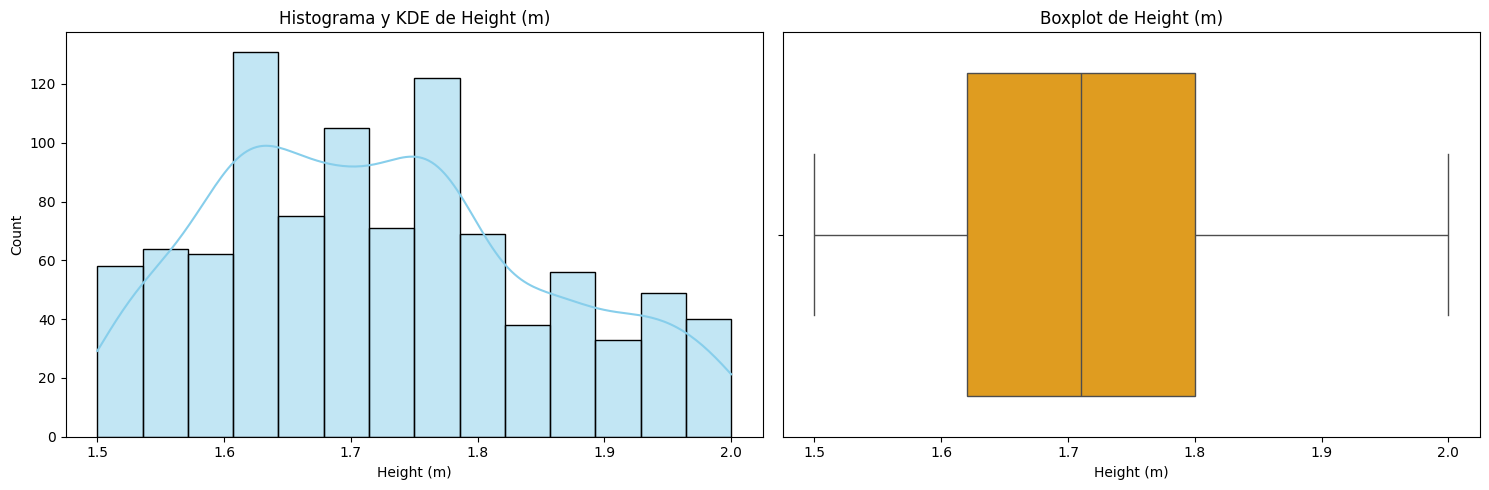

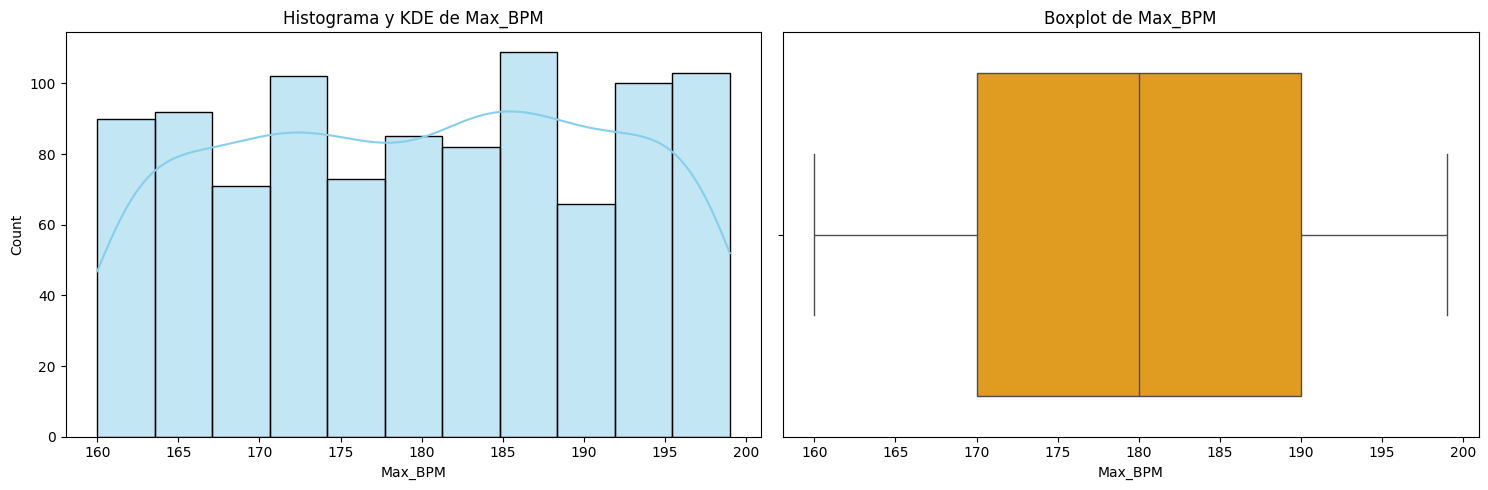

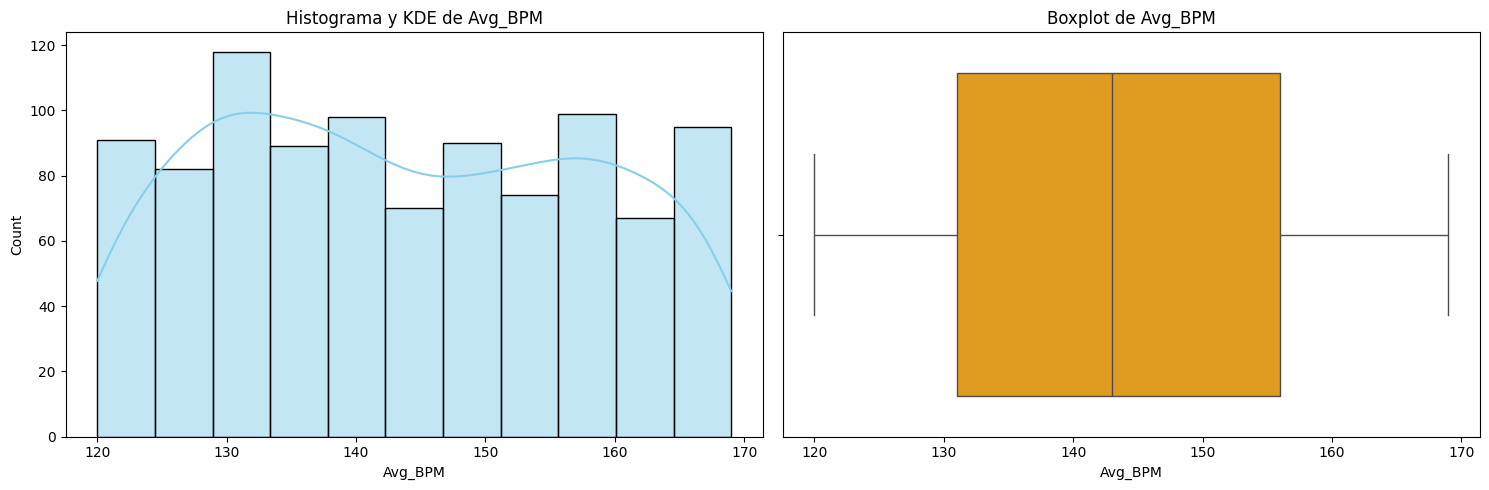

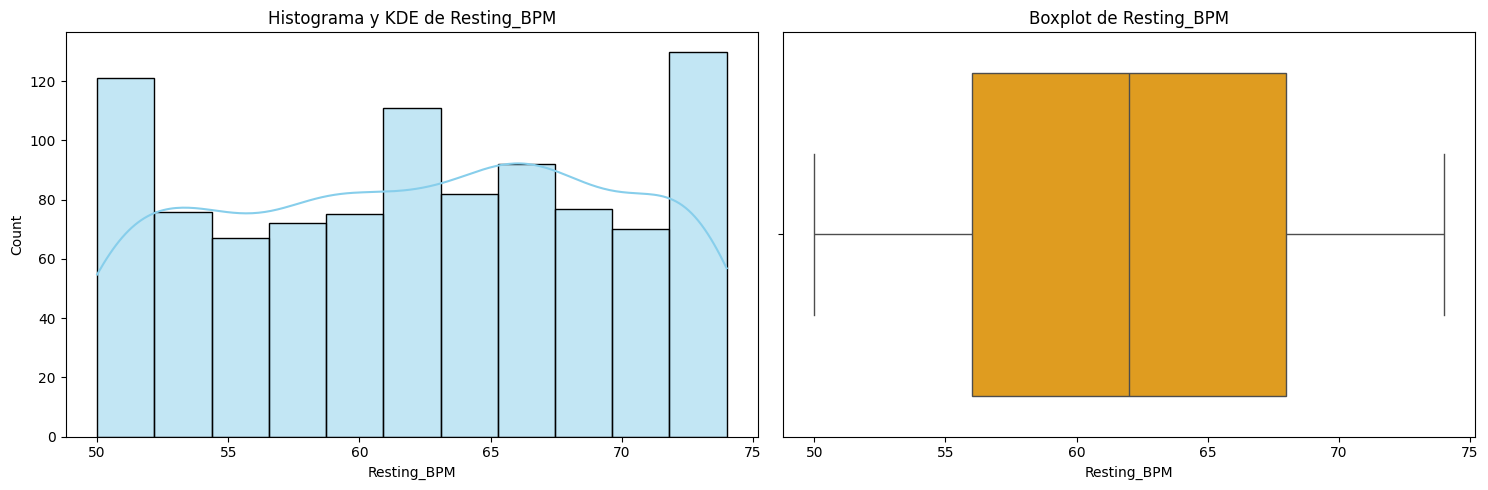

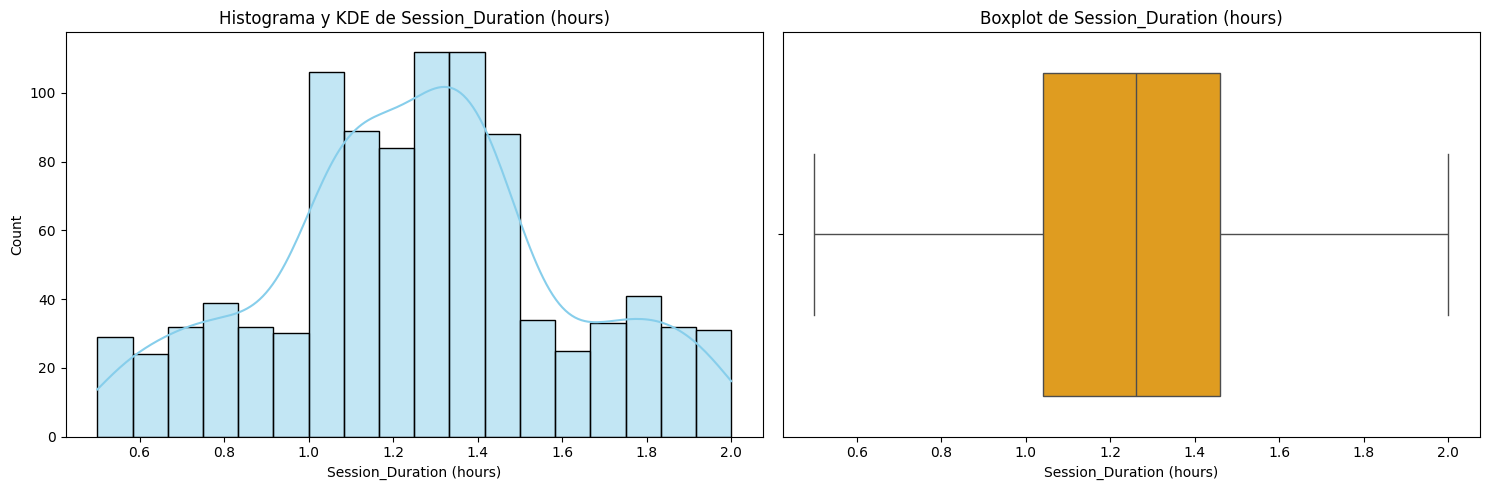

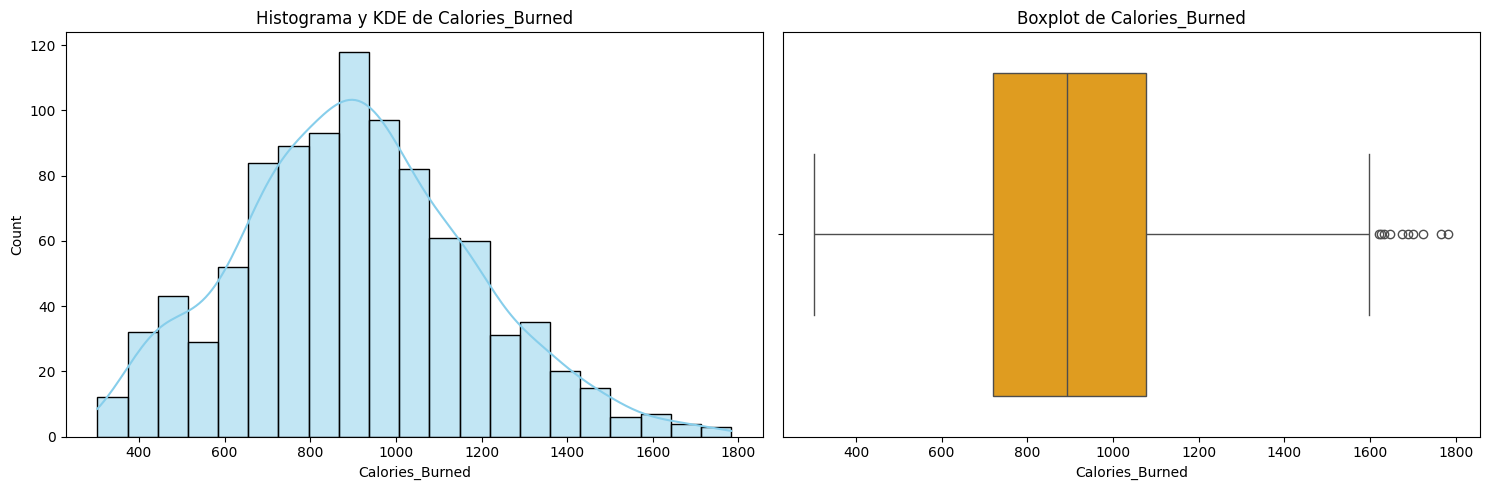

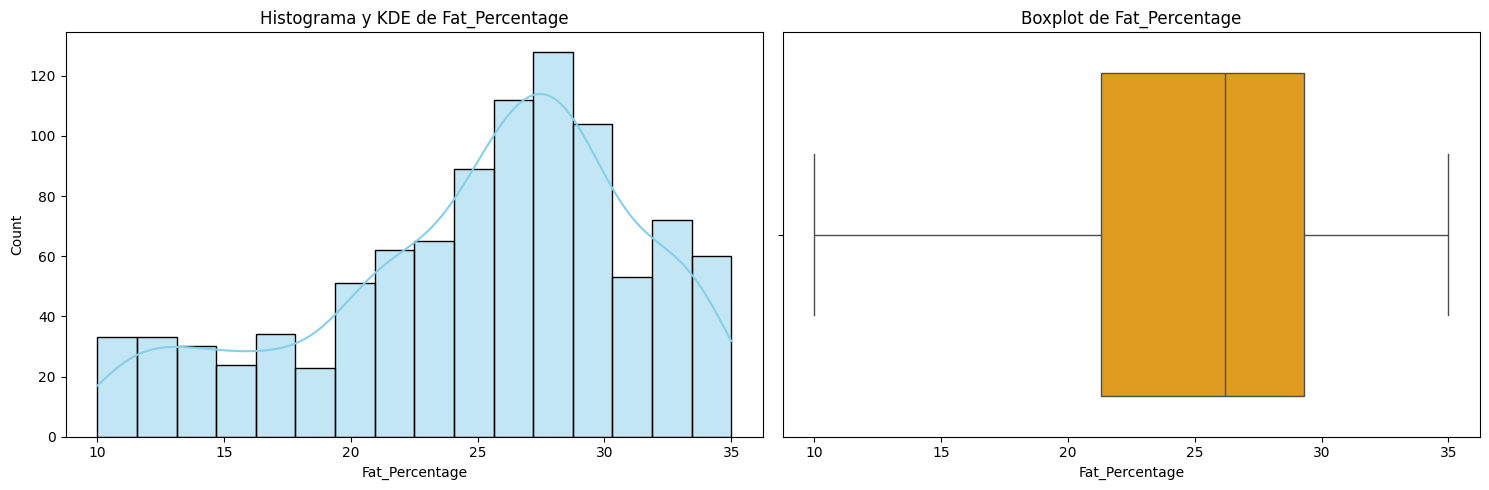

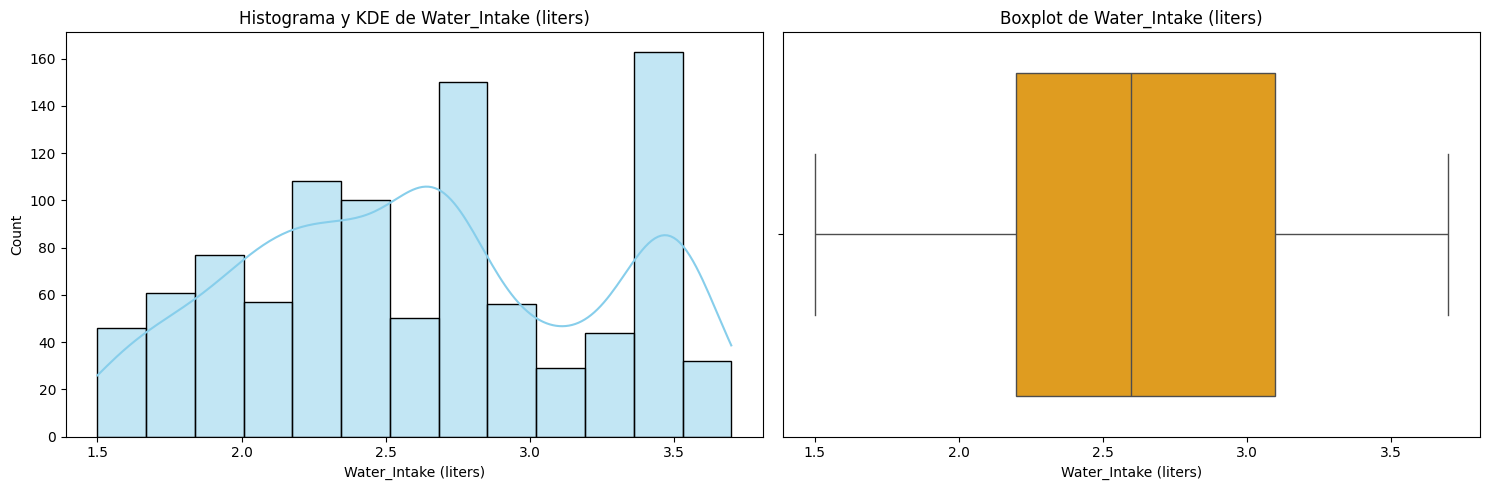

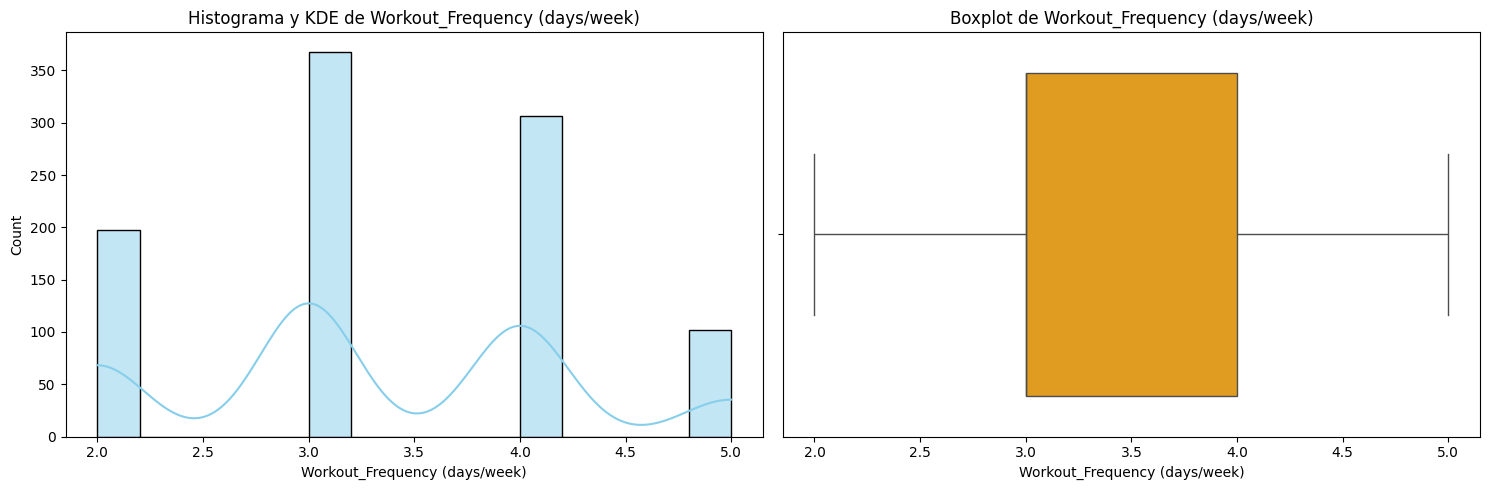

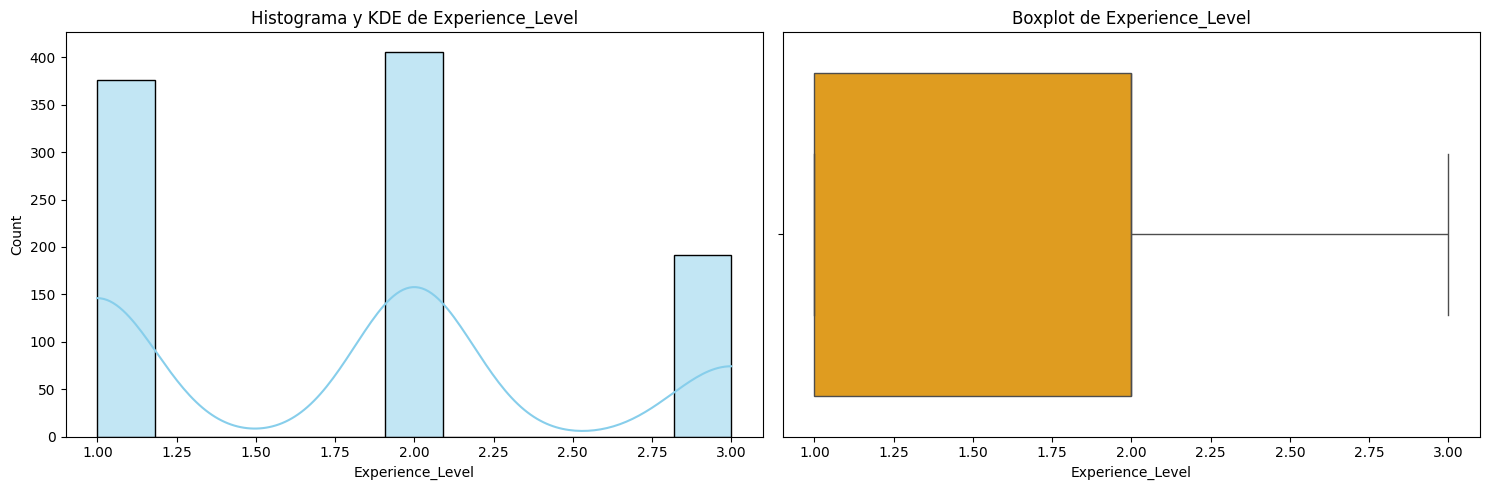

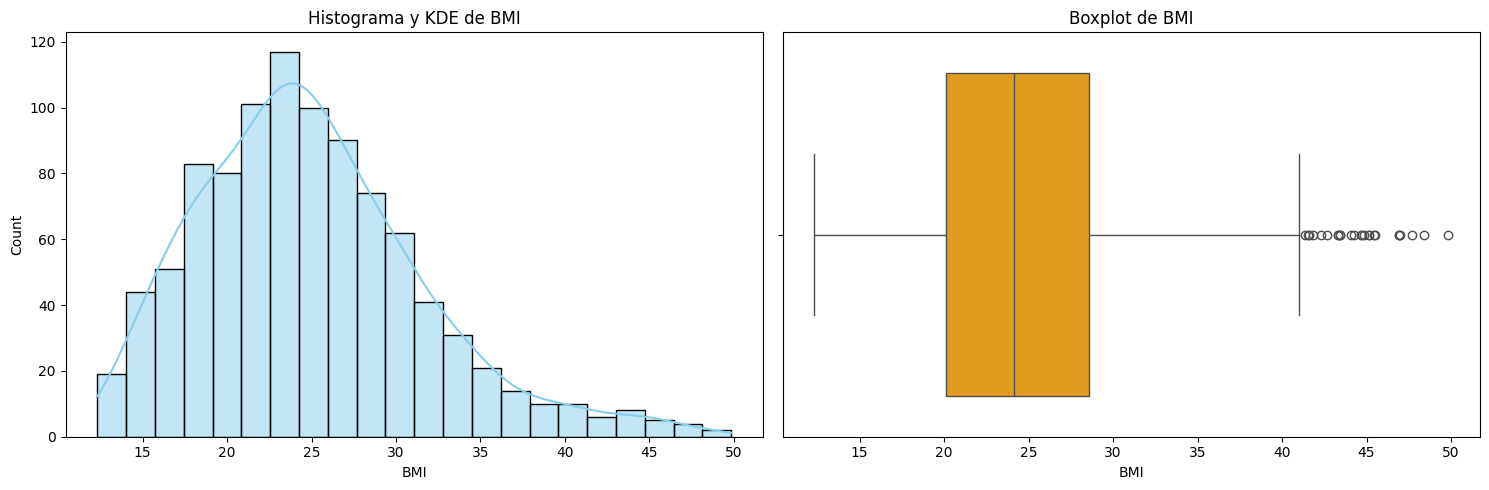

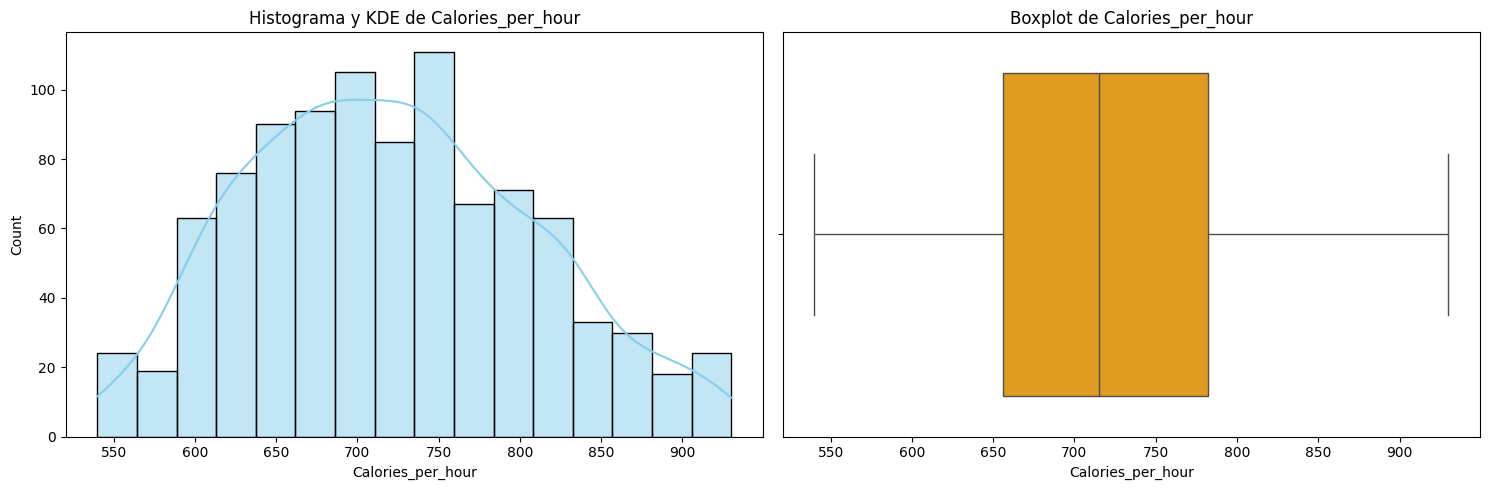

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/266553811.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_gym[col], palette='viridis')


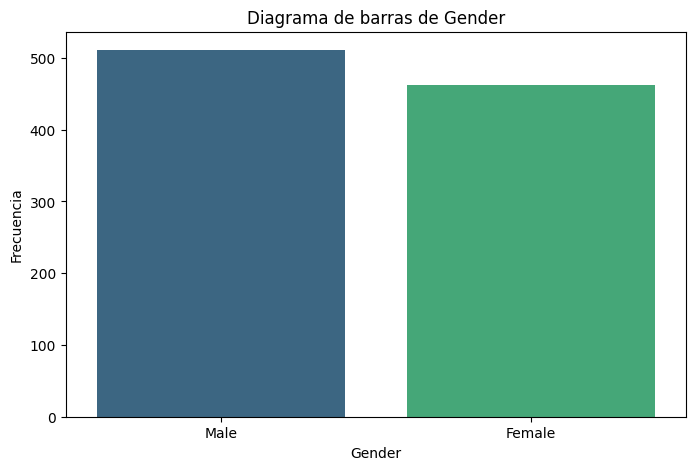

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/266553811.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_gym[col], palette='viridis')


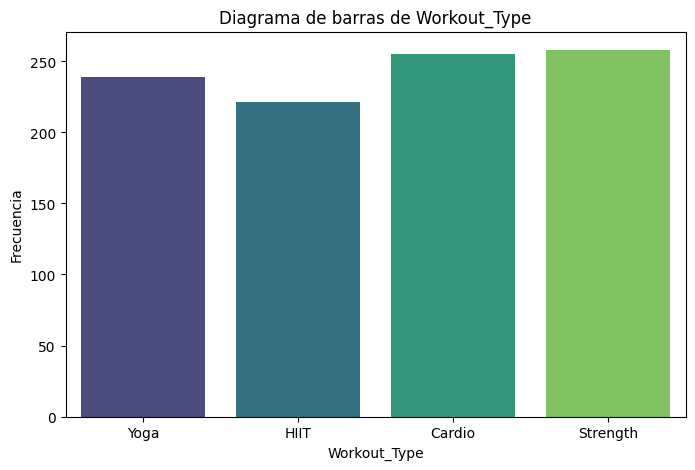

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/266553811.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_gym[col], palette='viridis')


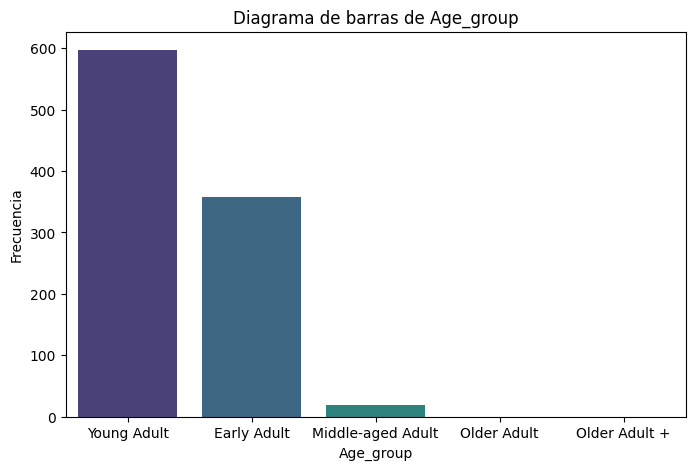

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/266553811.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_gym[col], palette='viridis')


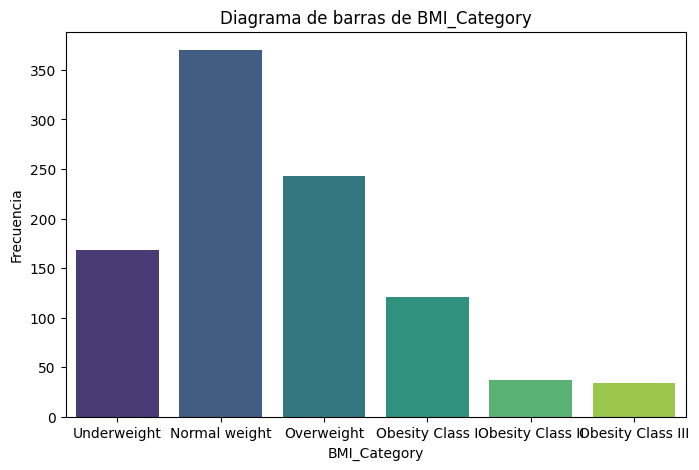

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/266553811.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_gym[col], palette='viridis')


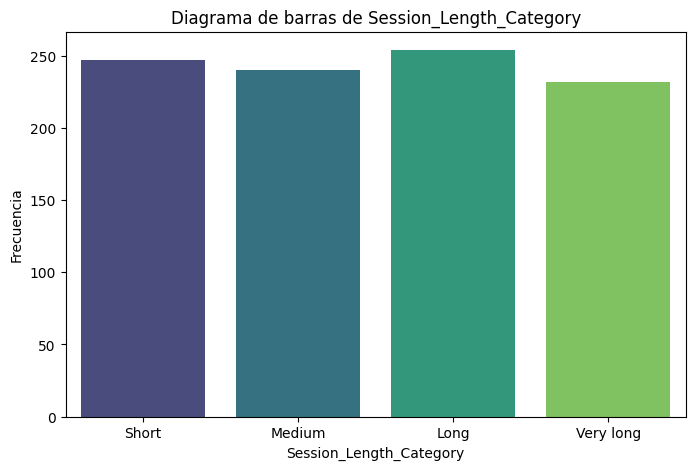

In [81]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

# Separo las variables numéricas y categóricas
numerical_vars = df_gym.select_dtypes(include=['float64', 'int64']).columns
categorical_vars = df_gym.select_dtypes(include=['object', 'category']).columns

# Creo la función para hacer el analisis univariantes
def estadisticos_univariantes(data, columnas):
    stats = {}
    for col in columnas:
        stats[col] = {
            'Media': np.mean(data[col]),
            'Mediana': np.median(data[col]),
            'Moda': data[col].mode()[0],
            'Varianza': np.var(data[col]),
            'Desviación Estándar': np.std(data[col]),
            'Rango': np.ptp(data[col]),
            'Mínimo': np.min(data[col]),
            'Máximo': np.max(data[col]),
            'Cuartiles': data[col].quantile([0.25, 0.5, 0.75]).to_dict(),
            'Percentil 10': np.percentile(data[col], 10),
            'Percentil 90': np.percentile(data[col], 90)
        }
    return stats

stats_numericas = estadisticos_univariantes(df_gym, numerical_vars)
stats_df = pd.DataFrame(stats_numericas).T
print("Estadísticos univariantes para variables numéricas:")
print(stats_df)

# Creo las gráfica para las estas variables
for col in numerical_vars:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sns.histplot(df_gym[col], kde=True, ax=axes[0], color='skyblue') # Es el histograma
    axes[0].set_title(f'Histograma y KDE de {col}')
    axes[0].set_xlabel(col)

    sns.boxplot(x=df_gym[col], ax=axes[1], color='orange') # Es el boxplot
    axes[1].set_title(f'Boxplot de {col}')
    axes[1].set_xlabel(col)
    plt.tight_layout()
    plt.show()

# Aqui me encargo de las de variables categóricas
for col in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df_gym[col], palette='viridis')
    plt.title(f'Diagrama de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


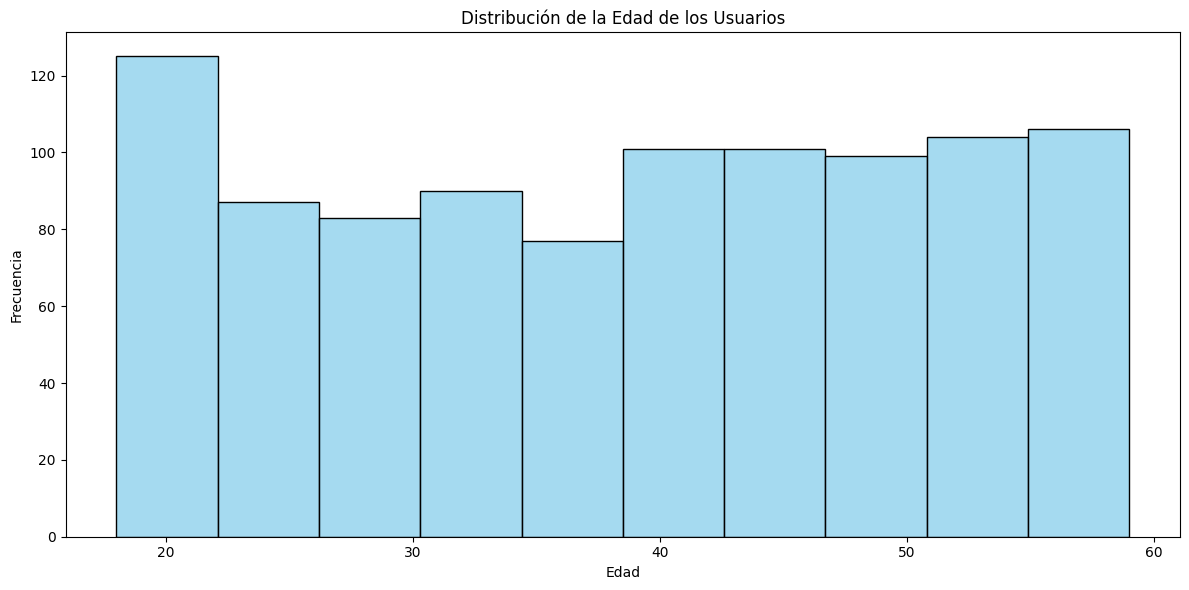

In [82]:
# Histograma de la distribución de la edad, arriba lo he hecho pero no me cuadraban los datos
sns.histplot(df_gym['Age'], kde=False, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribución de la Edad de los Usuarios")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

In [83]:
# Necesito calcular el % de hombres y mujeres
gender_counts = df_gym['Gender'].value_counts()
total = gender_counts.sum()
gender_percentage = (gender_counts / total) * 100
gender_percentage

Gender
Male      52.517986
Female    47.482014
Name: count, dtype: float64

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/2995659358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_gym, x='Experience_Level', palette='viridis')  # Hago el gráfico de barras


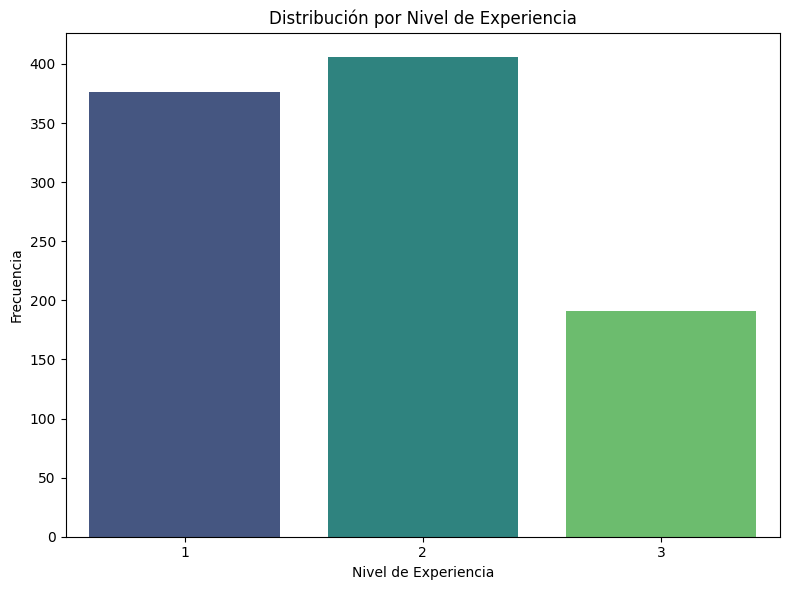

In [66]:
plt.figure(figsize=(8, 6))  # Indico el tamaño de la figura
sns.countplot(data=df_gym, x='Experience_Level', palette='viridis')  # Hago el gráfico de barras
plt.title("Distribución por Nivel de Experiencia")
plt.xlabel("Nivel de Experiencia")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

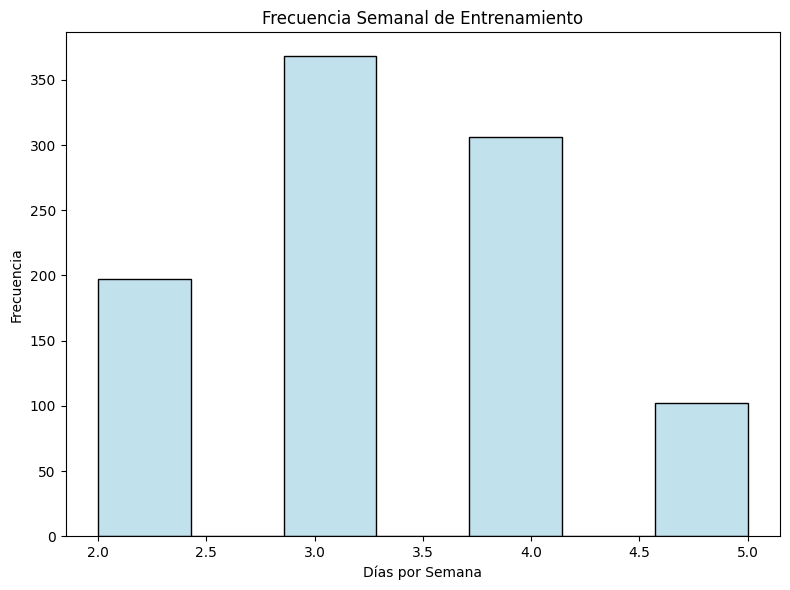

In [70]:
plt.figure(figsize=(8, 6))
sns.histplot(df_gym['Workout_Frequency (days/week)'], bins=7, color='lightblue', edgecolor='black')
plt.title("Frecuencia Semanal de Entrenamiento")
plt.xlabel("Días por Semana")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

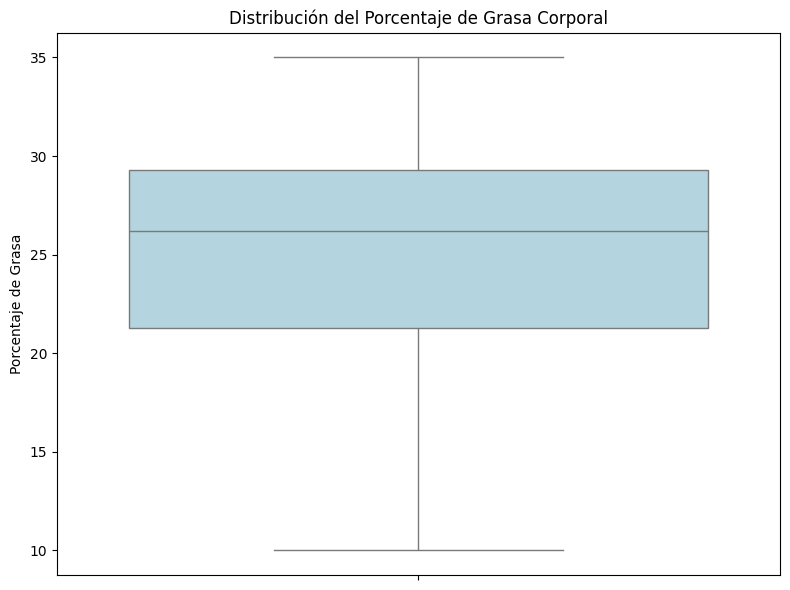

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_gym, y='Fat_Percentage', color='lightblue')
plt.title("Distribución del Porcentaje de Grasa Corporal")
plt.ylabel("Porcentaje de Grasa")
plt.tight_layout()
plt.show()

A continuación hago un análisis de las variables numéricas


Análisis variable **Age**:

1. La edad media de los miembros del gym son de 38,7 años
2. La mayoría de las personas tienen entre 28 y 49 años
3. La distribución es centrada, sin outliers significativos.
4. Es un grupo mayormente adulto, con predominio de jóvenes y adultos medios.

Análisis variable **Weight (Kg)**:

1. El peso medio es de 73,85 kg
2. Hay más de 9 personas con pesos superiores a 110 kg -> esto hay que contrastadlo con el indice de masa muscular

Análisis variable **Heigth (m)**:

1. La altura media es 1,72 m

Análisis de las variables **Max_BPM y Avg_BPM**:

1. La frecuencia cardíaca máxima es 179,88 BPM, con valores entre 160 y 199 BPM.
2. La frecuencia cardíaca promedio está en 143,77 BPM ->  distribución uniforme.

Análisis de las variables **Calories_Burned**:

1. La media de calorías quemadas es de 905,42, pero la distribución muestra una asimetría positiva. Se llega a las 1783 calorías.
2. Hay 10 outliers en el extremo superior = entrenamientos muy intensos o prolongados.

Análisis de las variables **BMI**:

1. El BMI medio es 24,91, que corresponde a la categoría de peso normal.

Análisis de las variables **Fat_Percentage**:

1. El porcentaje de grasa corporal medio es 24,98%

Análisis de las variables **Water_Intake (liters)**:

1. La ingesta de agua promedio es 2,63 litros/día, con una distribución uniforme y sin valores extremos.

Análisis de las variables **Session_Duration (hours)**:

1. La duración media de las sesiones es 1,26 horas, con un rango entre 0,5 y 2 horas.
2. Hay una mayor concentración de sesiones en la franja de 1 a 1,5 horas.



A continuación hago un análisis de las variables categóricas


Análisis variable **Gender**:

1. La distribución entre hombres y mujeres es casi igual -> dato calculado arriba

Análisis variable **Workout_type**:

1. Los tipos de entrenamiento más frecuentes son Strength y Cardio, seguidos por HIIT y Yoga.
2. Esto sugiere una preferencia por entrenamientos de fuerza y cardiovasculares.

Análisis variable **Experience_Level**:

1. La mayoría de los miembros se encuentran en niveles 1 (principiante) y 2 (intermedio), con una menor proporción en nivel 3 (avanzado).
2. Esto podría indicar que hay una predominancia de usuarios menos experimentados en el gimnasio.

Análisis variable **Workout_Frequency (days/week)**:

1. La frecuencia más común es de 3 a 4 días por semana, con un promedio de 3.32 días.
2. Pocos usuarios entrenan menos de 3 días o más de 5 días.

## Análisis Bivariante

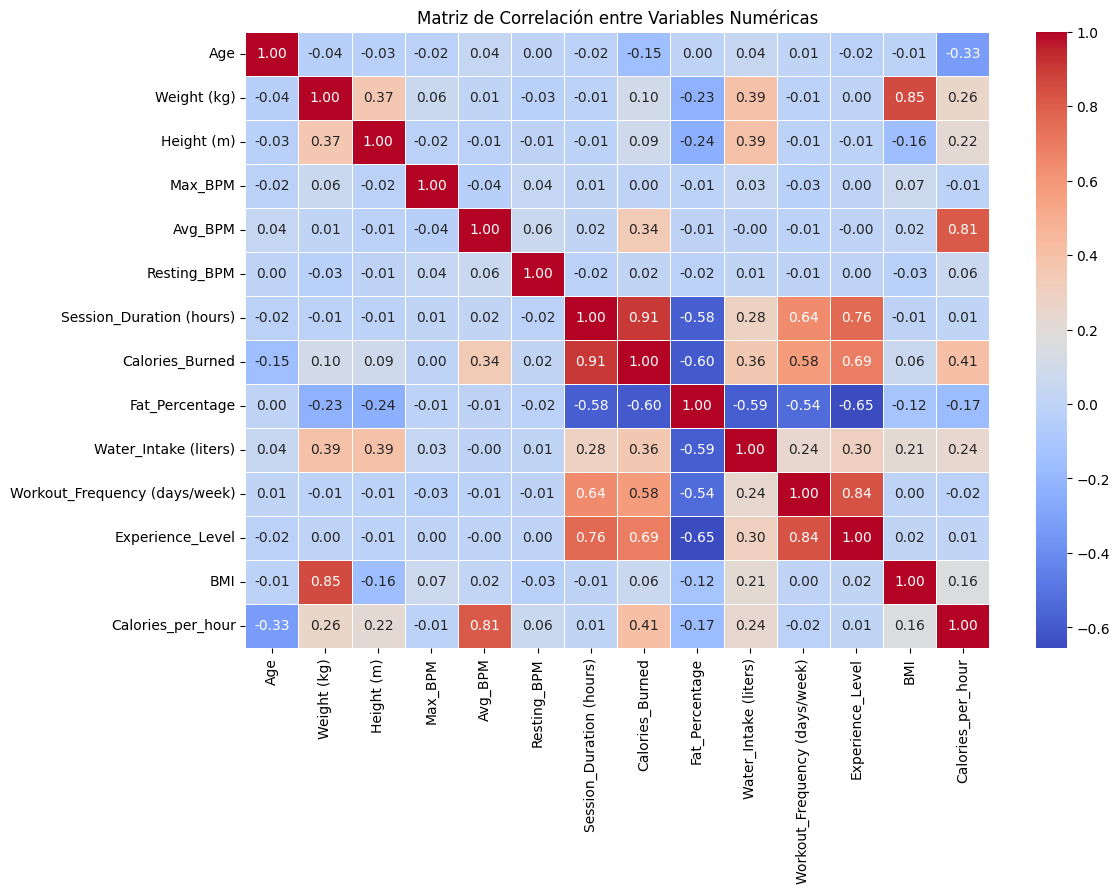

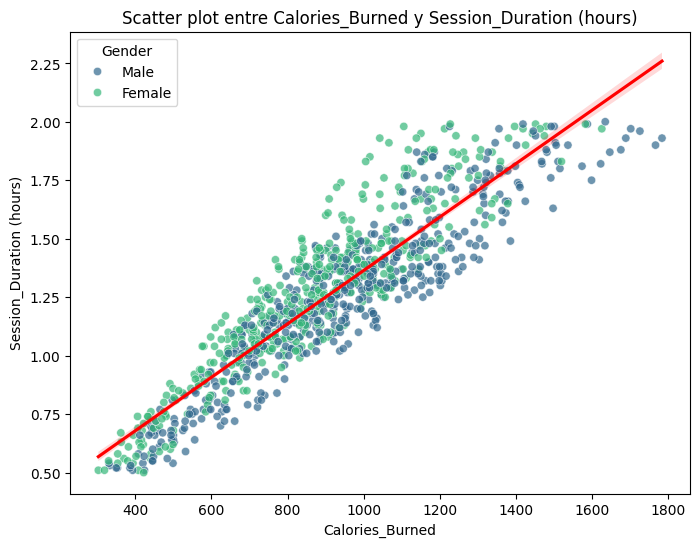

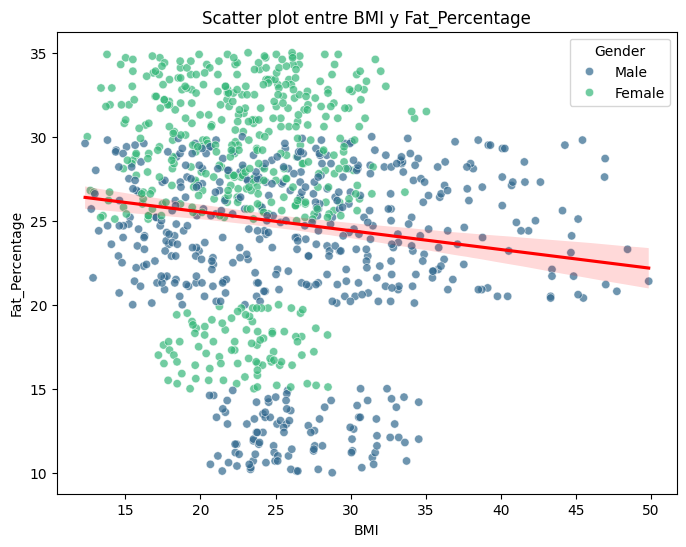

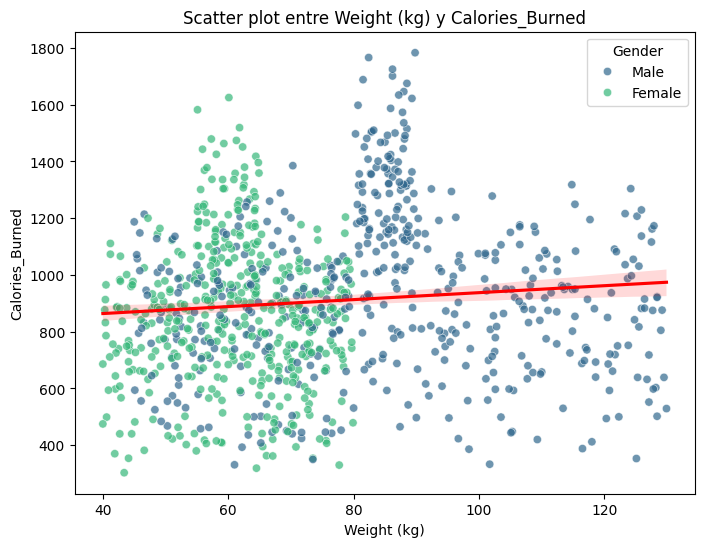

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/2362874310.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym, x=cat_var, y=num_var, palette='Set2')


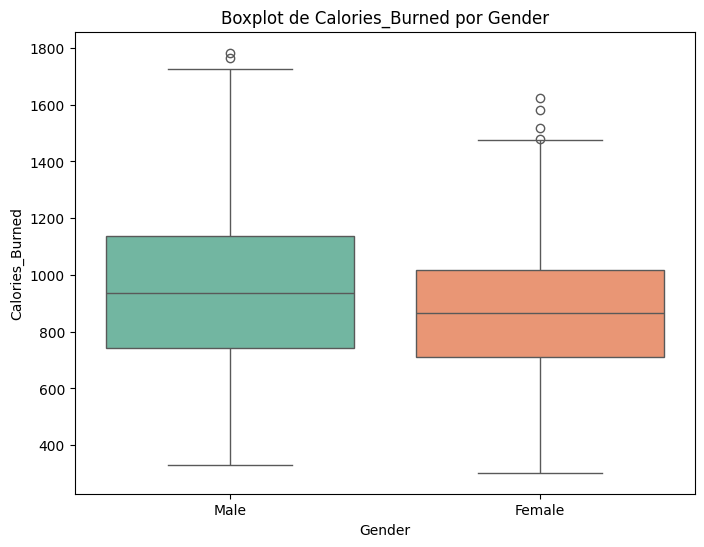

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/2362874310.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym, x=cat_var, y=num_var, palette='Set2')


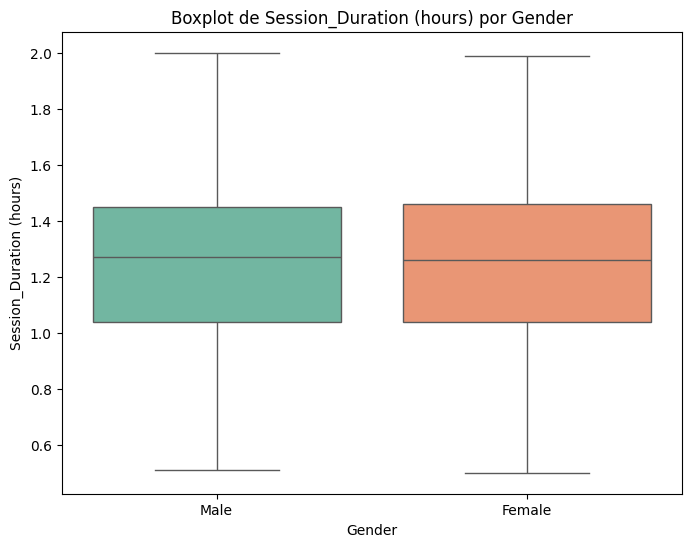

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/2362874310.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym, x=cat_var, y=num_var, palette='Set2')


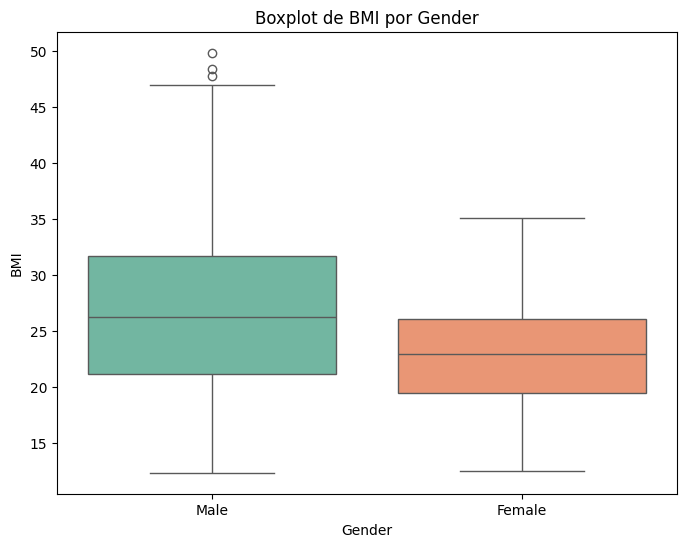

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/2362874310.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym, x=cat_var, y=num_var, palette='Set2')


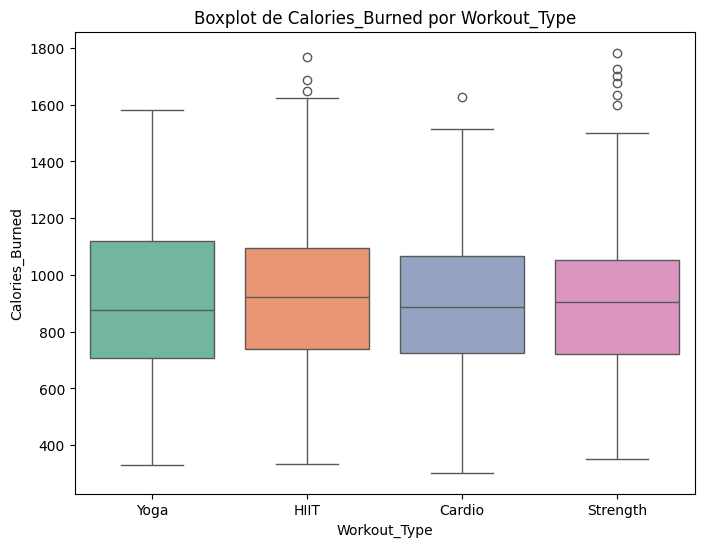

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/2362874310.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym, x=cat_var, y=num_var, palette='Set2')


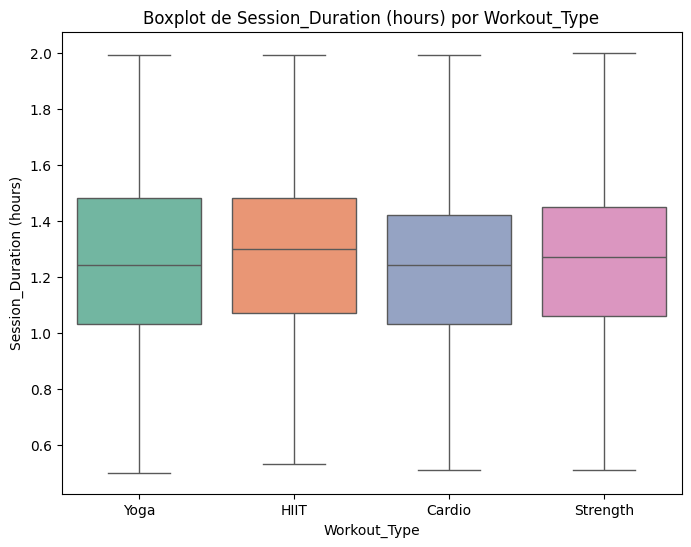

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/2362874310.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym, x=cat_var, y=num_var, palette='Set2')


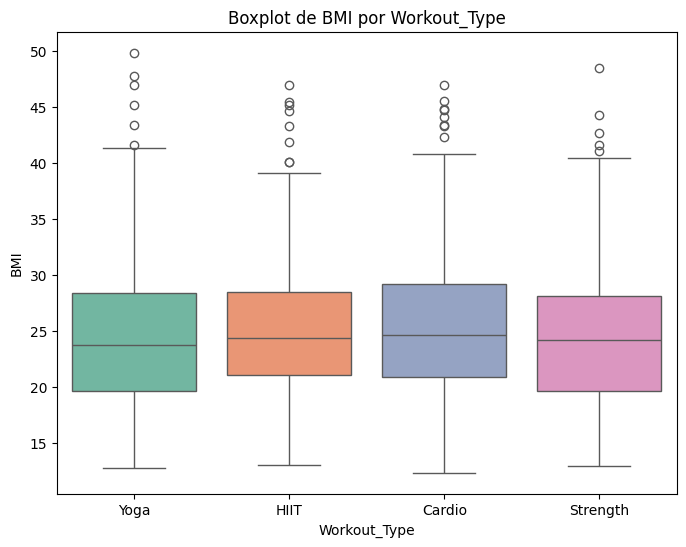

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/2362874310.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym, x=cat_var, y=num_var, palette='Set2')


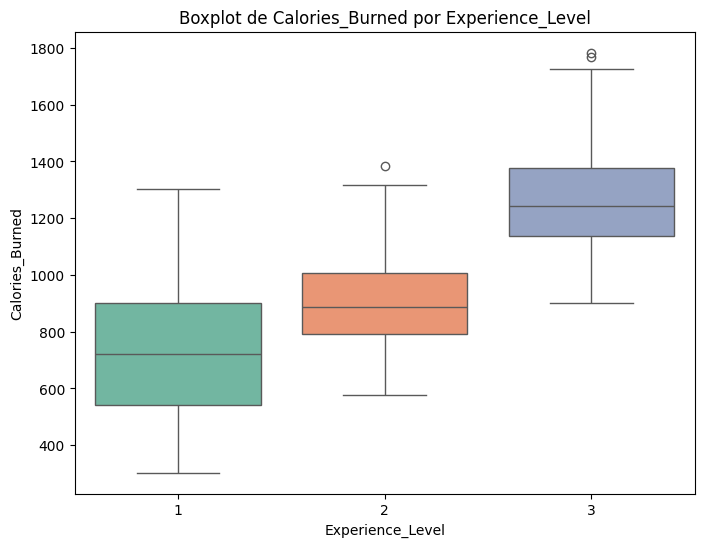

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/2362874310.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym, x=cat_var, y=num_var, palette='Set2')


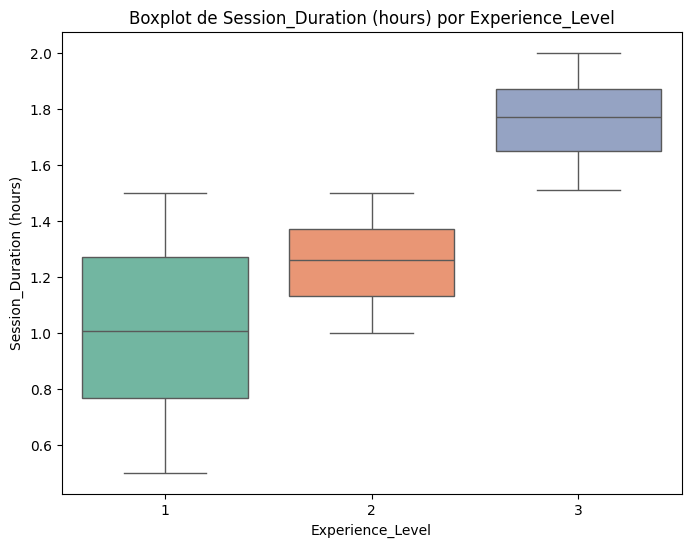

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/2362874310.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym, x=cat_var, y=num_var, palette='Set2')


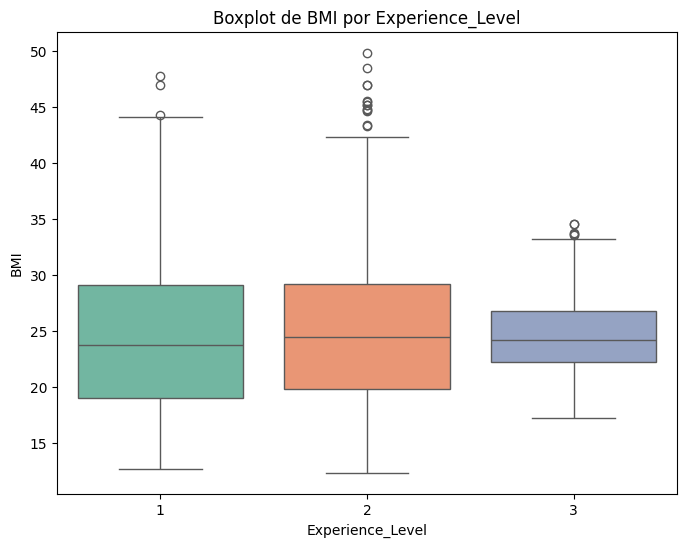

Tabla cruzada entre Workout_Type y Gender:
Gender        Female  Male
Workout_Type              
Cardio           126   129
HIIT             107   114
Strength         123   135
Yoga             106   133


In [84]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

# Hago la matriz de correlación y heatmap
correlation_matrix = df_gym.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Aqui el S¡scatter plots con regresión para variables relevantes
num_pairs = [('Calories_Burned', 'Session_Duration (hours)'),
             ('BMI', 'Fat_Percentage'),
             ('Weight (kg)', 'Calories_Burned')]

for x, y in num_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_gym, x=x, y=y, hue='Gender', palette='viridis', alpha=0.7)
    sns.regplot(data=df_gym, x=x, y=y, scatter=False, color='red')
    plt.title(f"Scatter plot entre {x} y {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title="Gender")
    plt.show()

# Boxplots para variables categóricas y numéricas
categorical_vars = ['Gender', 'Workout_Type', 'Experience_Level']
numerical_vars = ['Calories_Burned', 'Session_Duration (hours)', 'BMI']

for cat_var in categorical_vars:
    for num_var in numerical_vars:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df_gym, x=cat_var, y=num_var, palette='Set2')
        plt.title(f"Boxplot de {num_var} por {cat_var}")
        plt.xlabel(cat_var)
        plt.ylabel(num_var)
        plt.show()

# Tabla cruzada entre Workout_Type y Gender
cross_table = pd.crosstab(df_gym['Workout_Type'], df_gym['Gender'])
print("Tabla cruzada entre Workout_Type y Gender:")
print(cross_table)

A continuación hago un análisis de la relación entre variables numéricas:

**Calores_Burned** vs **Session_Duration (hours)**:

1. Existe una correlación positiva fuerte (0.85).
2. Conclusión: Las sesiones más largas están asociadas a un mayor gasto calóric.

**BMI** vs **Fat_Percentage**:

1. La relación es moderadamente positiva (0.65), lo que indica que a medida que aumenta el porcentaje de grasa corporal, también tiende a aumentar el índice de masa corporal.
2. Conclusión: Aunque están relacionados, el BMI no solo depende de la grasa corporal sino también de otros factores como la masa muscular.

**Weight (kg)** vs **Calories_Burned**:

1. Existe una relación positiva leve. Las personas con mayor peso tienden a quemar más calorías, posiblemente debido al esfuerzo adicional en sus entrenameintos.
2. Conclusión: Las personas con mayor peso realizan entrenamientos de mayor intensidad o duración.


A continuación hago una comparativa de variables categóricas y numéricas

**Work_Type** vs **Calories_Burned**:

1. Los tipos de entrenamiento Strength y HIIT tienen las medianas más altas de calorías quemadas.
2. El tipo Yoga tiene la mediana más baja.
3. Conclusión: Strength y HIIT son entrenamientos que más caloria queman en comparación con Yoga, lo que resulta en un mayor gasto calórico.

**Gender** vs **BMI**:

1. Los hombres tienden a tener un BMI ligeramente más alto que las mujeres.
2. Conclusión: Esta diferencia puede reflejar diferencias biológicas como mayor masa muscular en hombres pero no que gasten más calorias en los entrenamientos que las mujeres. 

**Experience_Level** vs **Session_Duration**:
1. Los usuarios en nivel avanzado (3) tienden a realizar sesiones más cortas, pero su rendimiento (calorías quemadas) es probablemente más eficiente.
2. Conclusión: Los más experimentados optimizan sus entrenamientos, logrando resultados similares en menos tiempo.

**Tabla cruazada entre Workout_Type y Gender**:
1. La distribución de géneros en los distintos tipos de entrenamiento es bastante equilibrada.
2. Conclusión: Tanto hombres como mujeres participan de manera similar en entrenamientos como Strength, Cardio y HIIT.



A continuación hago un análisis de las correlaciones positivas y negativas:

- Hay una relación lineal positiva muy fuerte a mayor duración de la sesión, mayor cantidad de calorías quemadas.
- A mayor nivel de experiencia, menor porcentaje de grasa corporal, es decir, los usuarios del nivel 3 suelen tener una mejor composición corporal.
- A mayor porcentaje de grasa corporal, menor cantidad de calorías quemadas. Esto podría sugerir que las personas con más grasa tienen entrenamientos menos intensos o eficientes.
- A mayor ingesta de agua, menor porcentaje de grasa corporal. La ingesta adecuada de agua podría estar relacionada con mejores hábitos de salud. -> Descartado para la presentación

## Análisis multivariante

Columnas del DataFrame:
Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Calories_per_hour', 'Age_group', 'BMI_Category',
       'Session_Length_Category'],
      dtype='object')
Columnas corregidas:
Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Calories_per_hour', 'Age_group', 'BMI_Category',
       'Session_Length_Category'],
      dtype='object')


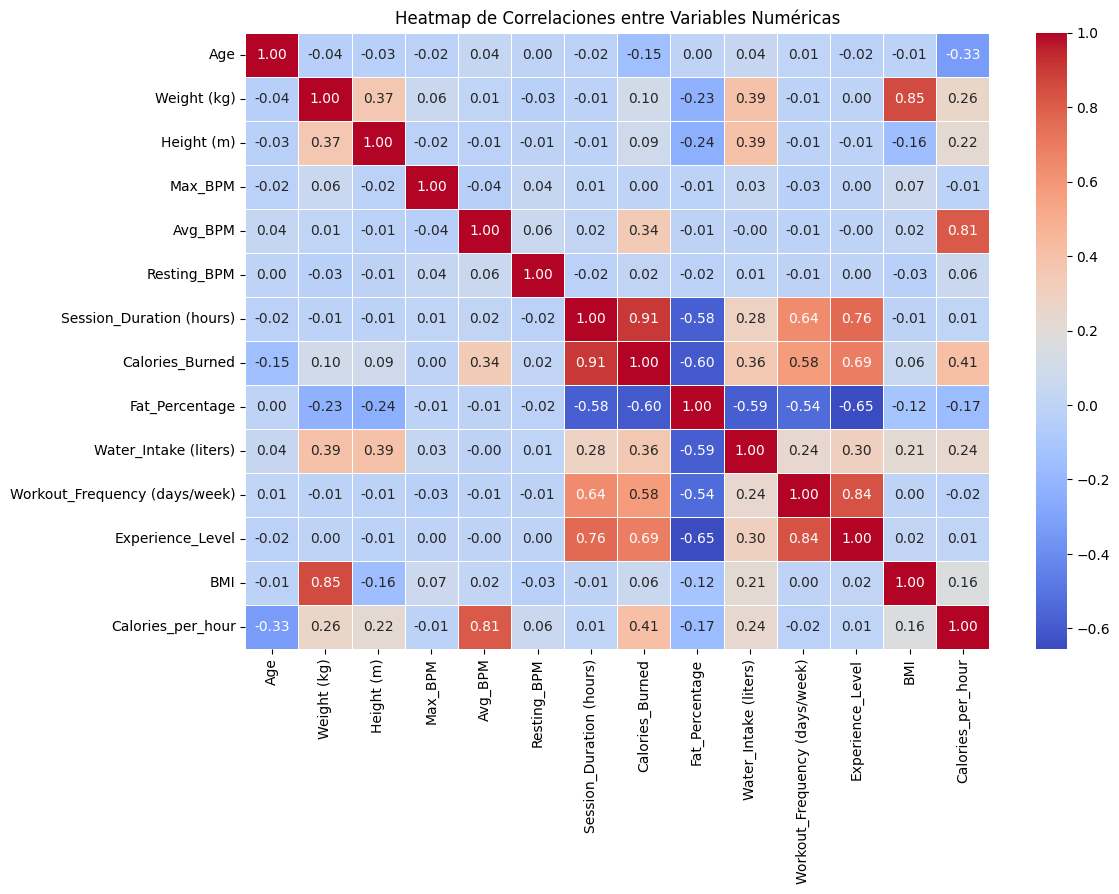

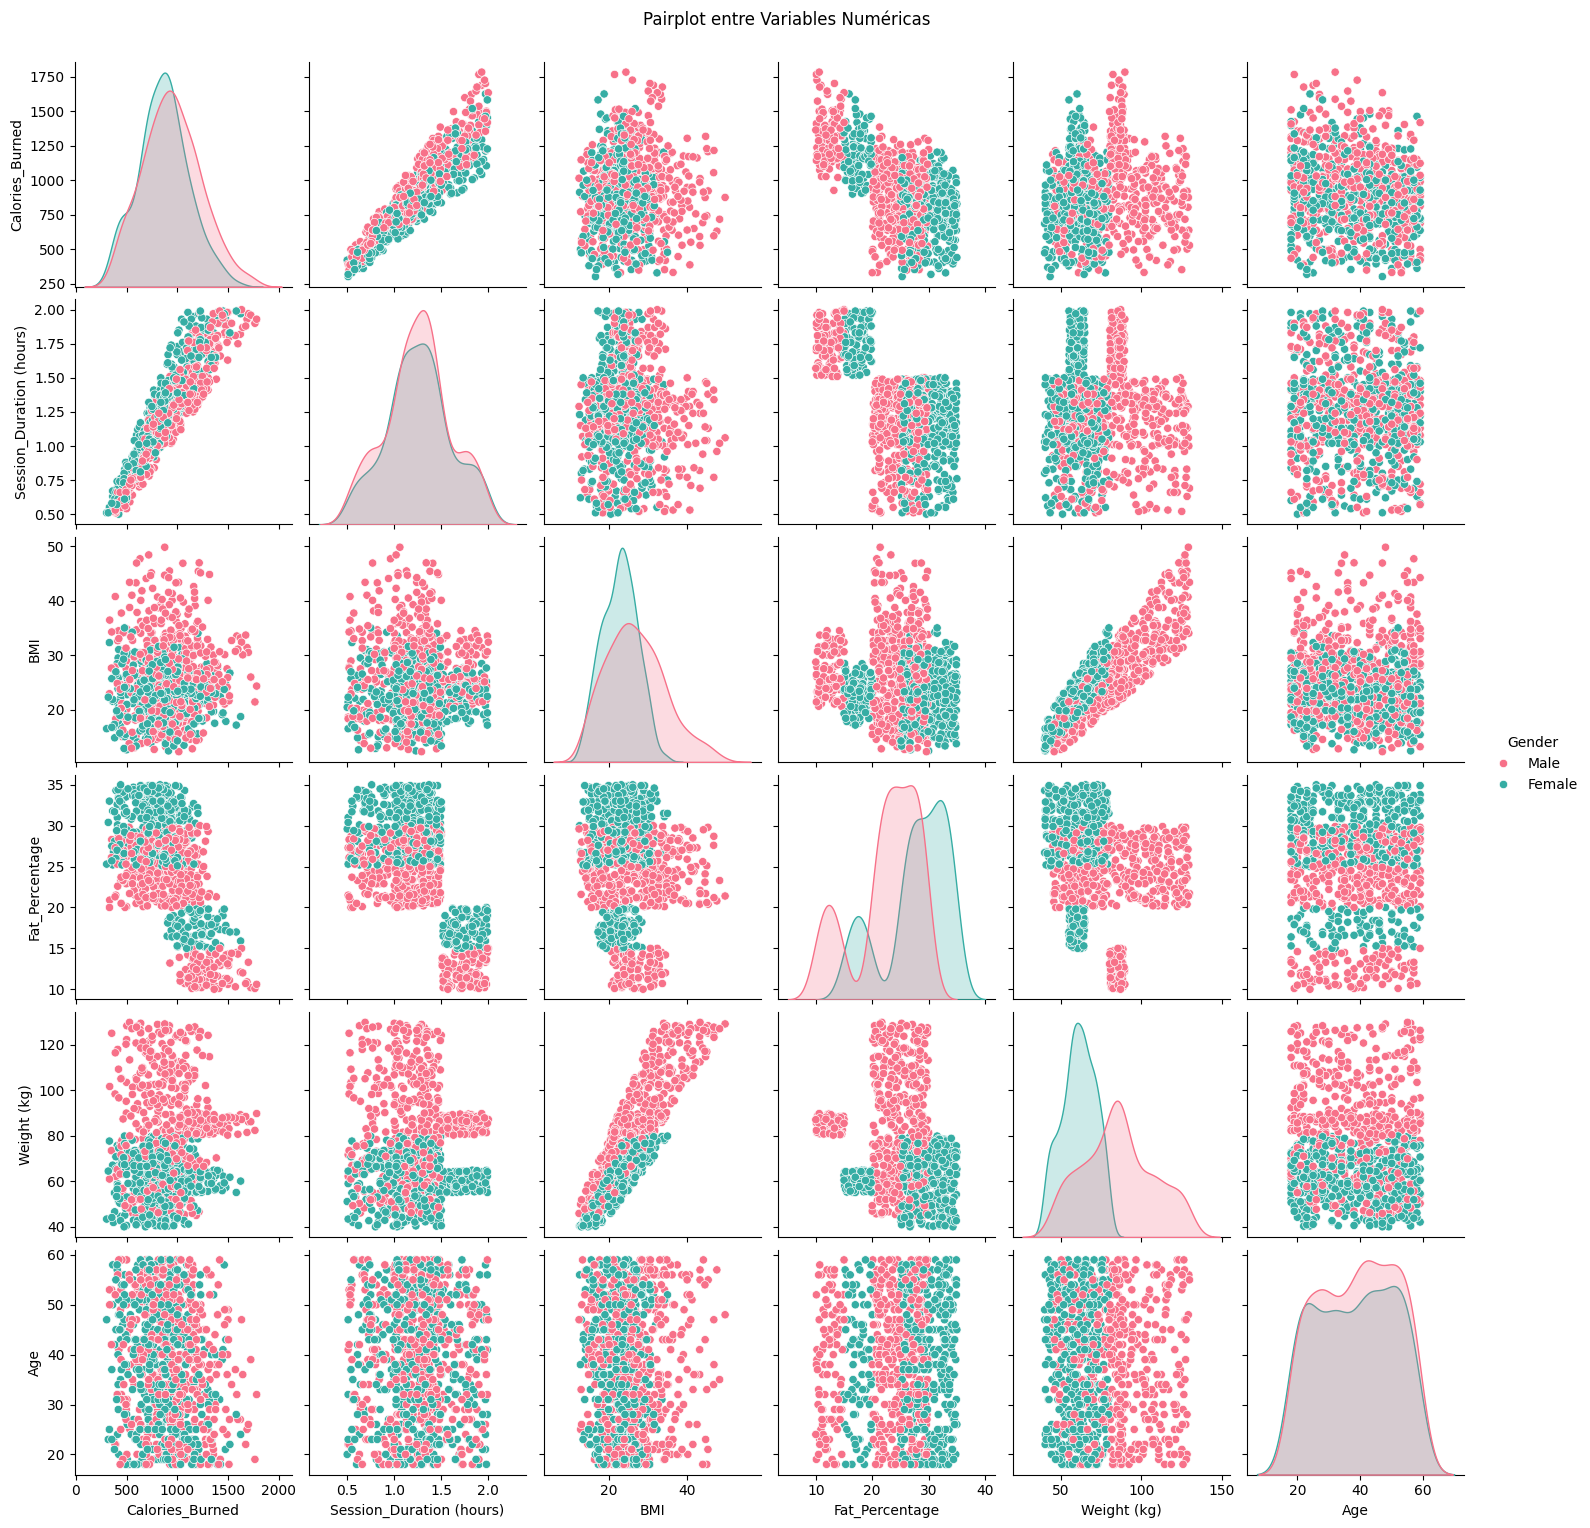

In [85]:
print("Columnas del DataFrame:")
print(df_gym.columns)
df_gym.columns = df_gym.columns.str.strip()
print("Columnas corregidas:")
print(df_gym.columns)

# Compruebo si la columna 'Gender' existe
if 'Gender' not in df_gym.columns:
    print("La columna 'Gender' no existe")
    hue_column = None
else:
    hue_column = 'Gender'

# Creo el heatmap de correlación entre variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = df_gym.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlaciones entre Variables Numéricas")
plt.show()


variables_importantes = ['Calories_Burned', 'Session_Duration (hours)', 'BMI', 
                         'Fat_Percentage', 'Weight (kg)', 'Age']
if hue_column:
    sns.pairplot(df_gym[variables_importantes + [hue_column]], hue=hue_column, palette='husl')
else:
    sns.pairplot(df_gym[variables_importantes])
    
plt.suptitle("Pairplot entre Variables Numéricas", y=1.02)
plt.show()


A continuación del análisis multivariante:

- Hay una correlación más fuerte entre las variables **Session_Duration** y **Calories_Burned** (0,91). Es decir, a mayor nivel de experiencia, - porcentaje de grasa corporal, es decir, los usuarios más experimentados suelen tener una mejor composición corporal.
- Hay una correlación positiva entre **BMI** y **Fat_Percentage** del 0,65. Aunque están relacionadas, el BMI no siempre refleja de manera precisa el porcentaje de grasa corporal, por la masa muscular.
- Existe una relación positiva leve entre **Weight** y **Calories_Burned**, lo que podría indicar que las personas con mayor peso tienden a quemar más calorías, probablemente porque requieren más esfuerzo físico en sus sesiones.
- Hay una correlaciones negativa moderada entre **Fat_Percentage** y **Experience_Level** (-0.65). A mayor experiencia en entrenamiento, menor porcentaje de grasa corporal, lo cual tiene sentido desde un punto de vista de salud física.
- No hay diferencias independientemnte del género.


Me quiero centrar en las sesiones que queman más calorias, para ello me centraré en el weigth, workout_type y experience_level.

Umbral de alto gasto calórico:

El percentil 90 de Calories_Burned es 1264.4 calorías.
Sesiones con gasto calórico superior a este valor se consideran "altas".
Cantidad de sesiones:

Hay 98 sesiones que superan este umbral.
Resumen estadístico de las características clave:

Peso (Weight):
Media: 79.09 kg
Mínimo: 55.1 kg
Máximo: 124.2 kg
Percentil 75%: 87.45 kg
Conclusión: Las personas con mayor peso tienden a tener más sesiones con alto gasto calórico.
Nivel de experiencia (Experience_Level):
Media: 2.89 (cercano a nivel 3, el más alto).
Distribución:
Nivel 3 (Avanzado): 91 sesiones.
Nivel 2 (Intermedio): 4 sesiones.
Nivel 1 (Principiante): 3 sesiones.
Conclusión: La mayoría de las sesiones intensas son realizadas por usuarios avanzados.
Distribución de los tipos de entrenamiento (Workout_Type):

Yoga: 28 sesiones.
HIIT: 25 sesiones.
Strength: 25 sesiones.
Cardio: 20 sesiones.
Conclusión: Yoga es el tipo de entrenamiento con más sesiones de alto gasto calórico, seguido de HIIT y Strength.


In [86]:
# Hago un análisis de gasto calórico por tipo de entrenamiento
print("Media de calorías quemadas por tipo de entrenamiento:")
calories_by_workout = df_gym.groupby('Workout_Type')['Calories_Burned'].mean().sort_values(ascending=False)
print(calories_by_workout)

# Investigo las calorías quemadas del Cardio
calories_cardio = df_gym[df_gym['Workout_Type'] == 'Cardio']['Calories_Burned'].mean()
calories_others = df_gym[df_gym['Workout_Type'] != 'Cardio']['Calories_Burned'].mean()
print(f"Calorías medias quemadas en Cardio: {calories_cardio:.2f}")
print(f"Calorías medias en otros entrenamientos: {calories_others:.2f}")

# Hago el análisis de BMI y tipo de entrenamiento predominante
print("Media del BMI por tipo de entrenamiento:")
bmi_by_workout = df_gym.groupby('Workout_Type')['BMI'].mean().sort_values(ascending=False)
print(bmi_by_workout)

# Genero la dstribución de géneros en Yoga y Strength
print("Distribución de géneros en Yoga y Strength:")
gender_yoga = df_gym[df_gym['Workout_Type'] == 'Yoga']['Gender'].value_counts()
gender_strength = df_gym[df_gym['Workout_Type'] == 'Strength']['Gender'].value_counts()
print("Yoga:\n", gender_yoga)
print("Strength:\n", gender_strength)

# Estuio la duración de sesiones por nivel de experiencia
print("Duración media de sesiones por nivel de experiencia:")
duration_by_experience = df_gym.groupby('Experience_Level')['Session_Duration (hours)'].mean()
print(duration_by_experience)

# Hao la relación entre frecuencia de entrenamiento y calorías quemadas
print("Correlación entre frecuencia semanal y calorías quemadas:")
freq_calories_corr = df_gym['Workout_Frequency (days/week)'].corr(df_gym['Calories_Burned'])
print(f"Correlación: {freq_calories_corr:.2f}")

# Hallo la relación entre peso y frecuencia de entrenamiento
print("Correlación entre peso y frecuencia semanal de entrenamiento:")
weight_freq_corr = df_gym['Weight (kg)'].corr(df_gym['Workout_Frequency (days/week)'])
print(f"Correlación: {weight_freq_corr:.2f}")

# Y, por último comparo la duración de sesiones en función de la edad
print("Correlación entre edad y duración de sesiones:")
age_duration_corr = df_gym['Age'].corr(df_gym['Session_Duration (hours)'])
print(f"Correlación: {age_duration_corr:.2f}")


Media de calorías quemadas por tipo de entrenamiento:
Workout_Type
HIIT        925.805430
Strength    910.697674
Yoga        903.188285
Cardio      884.513725
Name: Calories_Burned, dtype: float64
Calorías medias quemadas en Cardio: 884.51
Calorías medias en otros entrenamientos: 912.85
Media del BMI por tipo de entrenamiento:
Workout_Type
Cardio      25.377686
HIIT        25.201946
Yoga        24.545230
Strength    24.543605
Name: BMI, dtype: float64
Distribución de géneros en Yoga y Strength:
Yoga:
 Gender
Male      133
Female    106
Name: count, dtype: int64
Strength:
 Gender
Male      135
Female    123
Name: count, dtype: int64
Duración media de sesiones por nivel de experiencia:
Experience_Level
1    1.010213
2    1.247882
3    1.759267
Name: Session_Duration (hours), dtype: float64
Correlación entre frecuencia semanal y calorías quemadas:
Correlación: 0.58
Correlación entre peso y frecuencia semanal de entrenamiento:
Correlación: -0.01
Correlación entre edad y duración de sesione

/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_34593/4181963893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym, x='Workout_Type', y='Calories_Burned', palette='coolwarm')


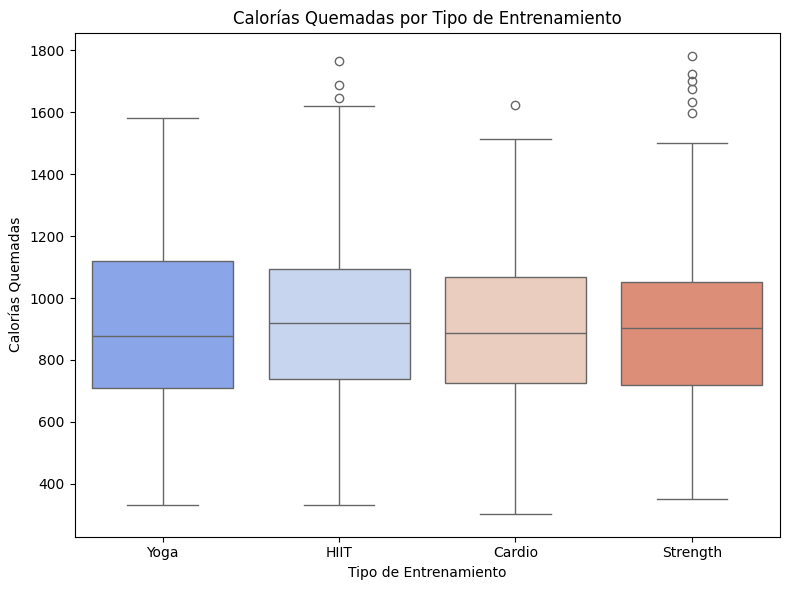

In [87]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(data=df_gym, x='Workout_Type', y='Calories_Burned', palette='coolwarm')
plt.title("Calorías Quemadas por Tipo de Entrenamiento")
plt.xlabel("Tipo de Entrenamiento")
plt.ylabel("Calorías Quemadas")
plt.tight_layout()
plt.show()

## Resultados